In [1]:
import pandas as pd
from time import mktime
from datetime import datetime, timedelta
import time
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
sns.set_theme()
sns.set_context("paper")

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data frame `Data Limpio` üìã </p> 

In [4]:
df10 = pd.read_csv('df10.csv', encoding='utf-8', low_memory=False)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">1. Revisando el data frame  üìã </p> 

In [5]:
#df.head()
df10.head().style.set_properties(**{
    'background-color': 'blue',
})

In [6]:
for col in df10.columns:
    print(col)

Nombre_Oficina_Arp
Numero_Uen_Arp
Siniestro_Arp_Id
Nombre_Sinies_Diagnosti_Princi
Siniestro_Diagnosti_Princi_Id
Nombre_Tipo_Atencion_Arp
DNI_IPS
Nombre_IPS
Nombre_Municipio_IPS
Nombre_Departamento_IPS
NOMBRE_SUCURSAL
NOMBRE_MUNICIPIO_SUCURSAL
NOMBRE_DEPARTAMENTO_SUCURSAL
Nombre_Municipio_Establecimiento
FECHA_ATENCION
Tipo_Llamada_Arp_Desc
TIPIFICACION
Cantidad
MUNICIPIO
HOMOLOGACION NIT
Year
Month
Day
Hour
Date
Nombre_Municipio_IPS2


In [7]:
filas, columnas = df10.shape
print(f"N√∫mero de filas: {filas}")
print(f"N√∫mero de columnas: {columnas}")

N√∫mero de filas: 9984660
N√∫mero de columnas: 26


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">2. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por hora (sin agregaci√≥n)  üìã </p>

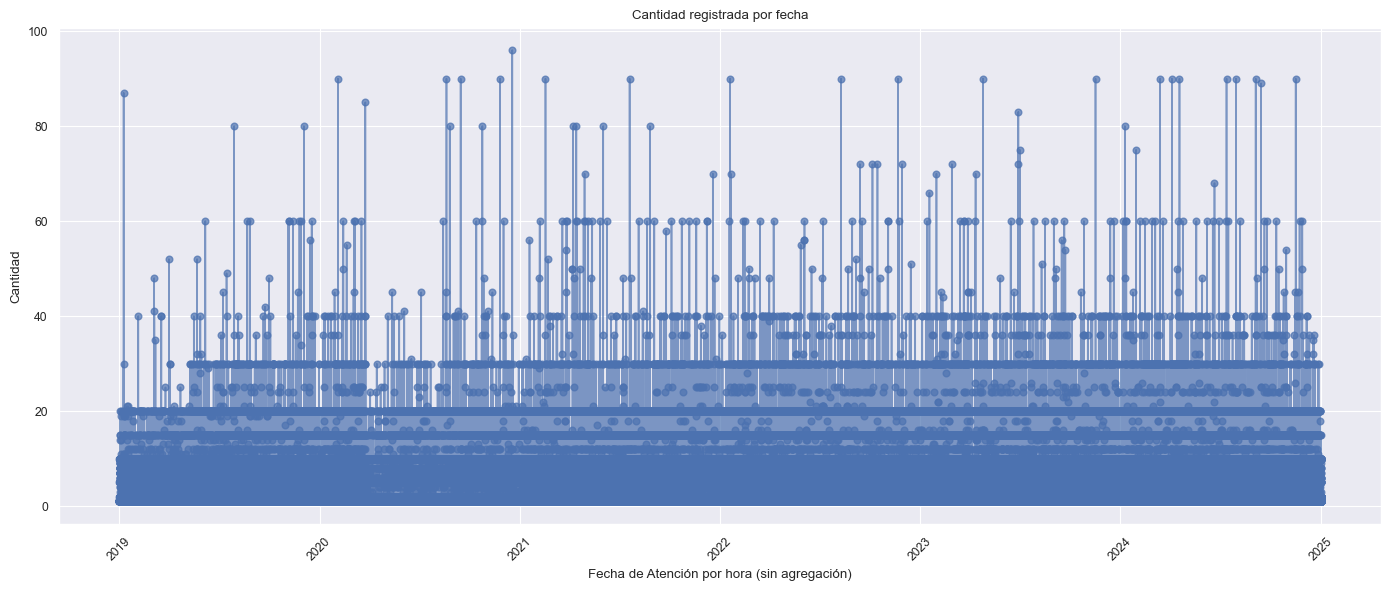

In [8]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Ordenar por fecha (opcional, mejora la visualizaci√≥n)
df10 = df10.sort_values('FECHA_ATENCION')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(df10['FECHA_ATENCION'], df10['Cantidad'], marker='o', linestyle='-', alpha=0.7)
plt.title('Cantidad registrada por fecha')
plt.xlabel('Fecha de Atenci√≥n por hora (sin agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### ¬øQu√© representa?

- Cada punto corresponde a un solo registro del DataFrame.

- Puede haber m√∫ltiples puntos para la misma fecha, uno por evento.

- Puede servir para analizar patrones individuales, variabilidad o ruido

### üìà Interpretaci√≥n:

- Se visualiza el comportamiento disperso y la distribuci√≥n individual de los eventos.

- √ötil para ver la variabilidad en la intensidad de cada registro.

- El gr√°fico no resume ni agrupa datos: muestra cada fila tal como est√°.

### üî¥ Limitaci√≥n:

- Hay mucho ruido visual si tienes miles de eventos por d√≠a.

- No es bueno para ver tendencias generales.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por hora (con agregaci√≥n)  üìã </p>  

### Tabla de frecuencias

Para que el gr√°fico sea con conteo diario agregado, solo se necesita agrupar por FECHA_ATENCION y sumar la Cantidad antes de graficar.

In [9]:
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
serie_diaria.head()

FECHA_ATENCION  Cantidad
0 2019-01-01 00:00:00      29.0
1 2019-01-01 01:47:00       1.0
2 2019-01-01 03:25:00       1.0
3 2019-01-01 06:30:00       1.0
4 2019-01-01 06:35:00       1.0

In [10]:
filas, columnas = serie_diaria.shape
print(f"N√∫mero de filas: {filas}")
print(f"N√∫mero de columnas: {columnas}")

N√∫mero de filas: 3548019
N√∫mero de columnas: 2


### üîç ¬øQu√© est√° pasando?

- Tienes m√∫ltiples registros el mismo d√≠a, pero en horas diferentes (como `2019-01-01 00:00:00`, `2`019-01-01 01:47:00`, etc.)

- Como groupby(`FECHA_ATENCION`) considera la hora y minuto, no los agrupa juntos.

- Por eso el valor `29.0` en la primera fila es solo para `00:00:00`, y no representa todo el `1 de enero`.

### Primera forma

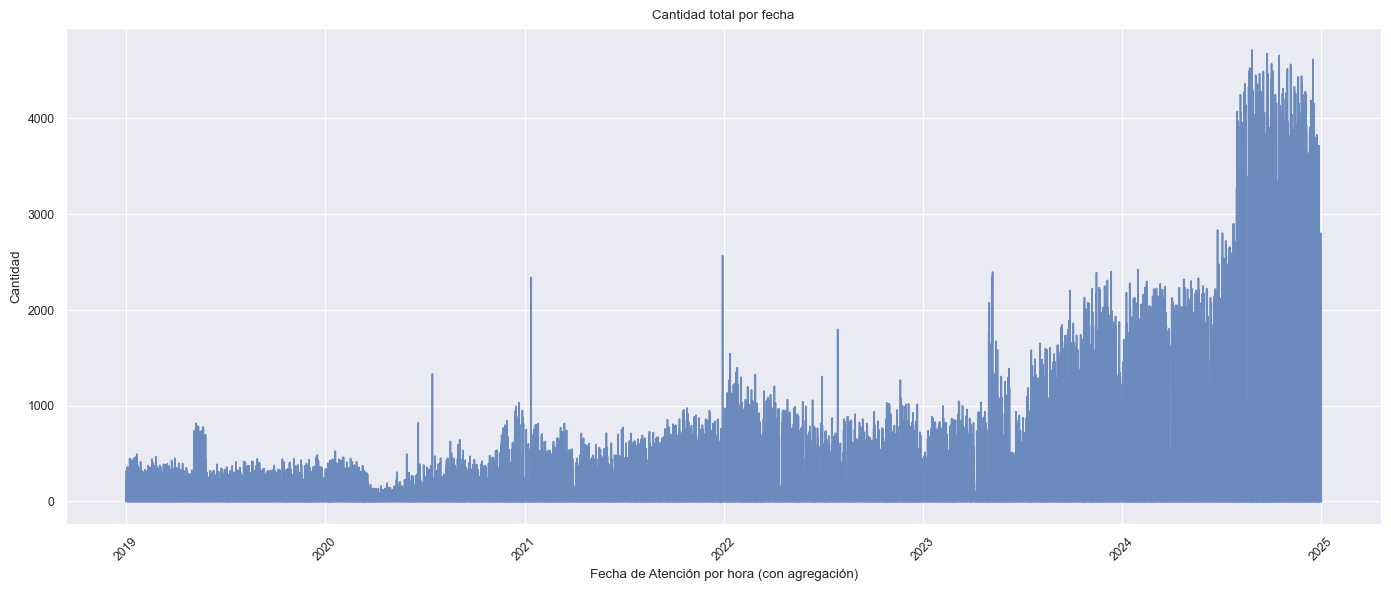

In [11]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()

# Ordenar por fecha (opcional)
serie_hora = serie_diaria.sort_values('FECHA_ATENCION')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por hora (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###  Segunda forma

<Axes: xlabel='FECHA_ATENCION'>

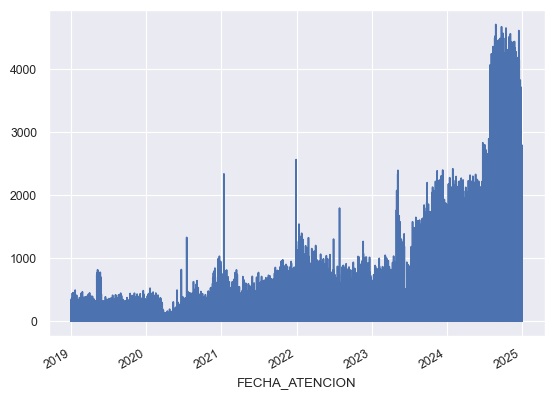

In [12]:
df10.groupby('FECHA_ATENCION')['Cantidad'].sum().plot()

### Tercera forma

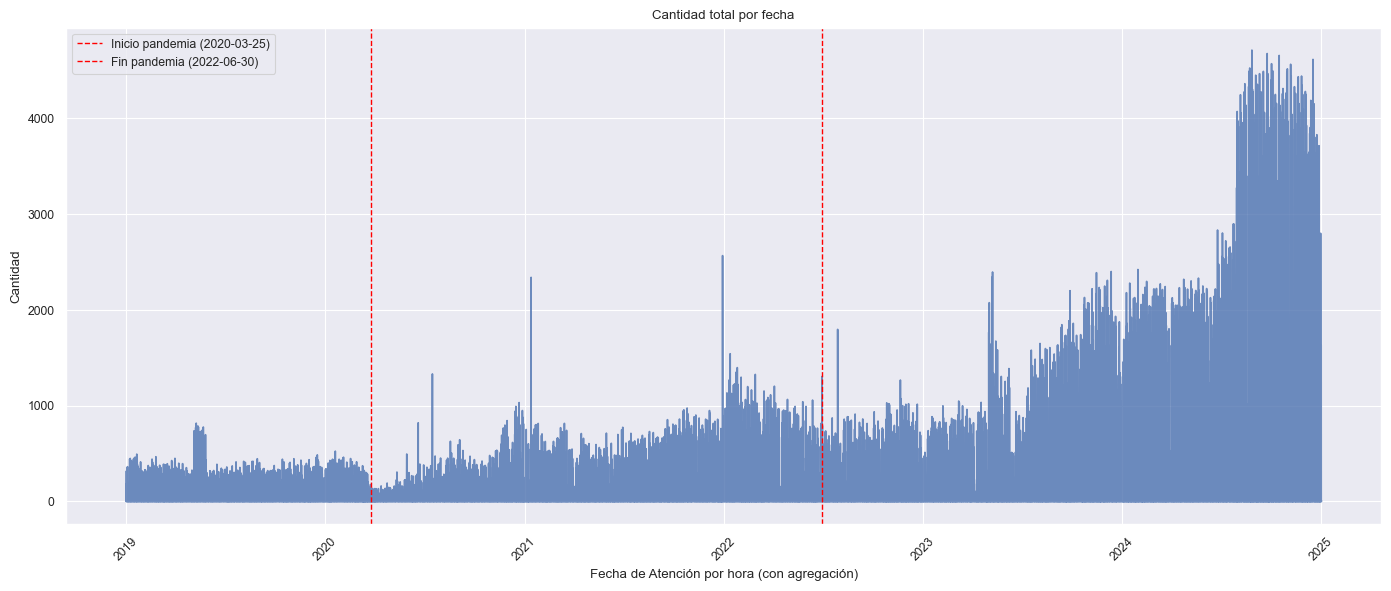

In [13]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()

# Ordenar por fecha (opcional)
serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# L√≠neas verticales rojas: inicio y fin de pandemia
plt.axvline(pd.to_datetime('2020-03-25'), color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(pd.to_datetime('2022-06-30'), color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Etiquetas y estilos
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por hora (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


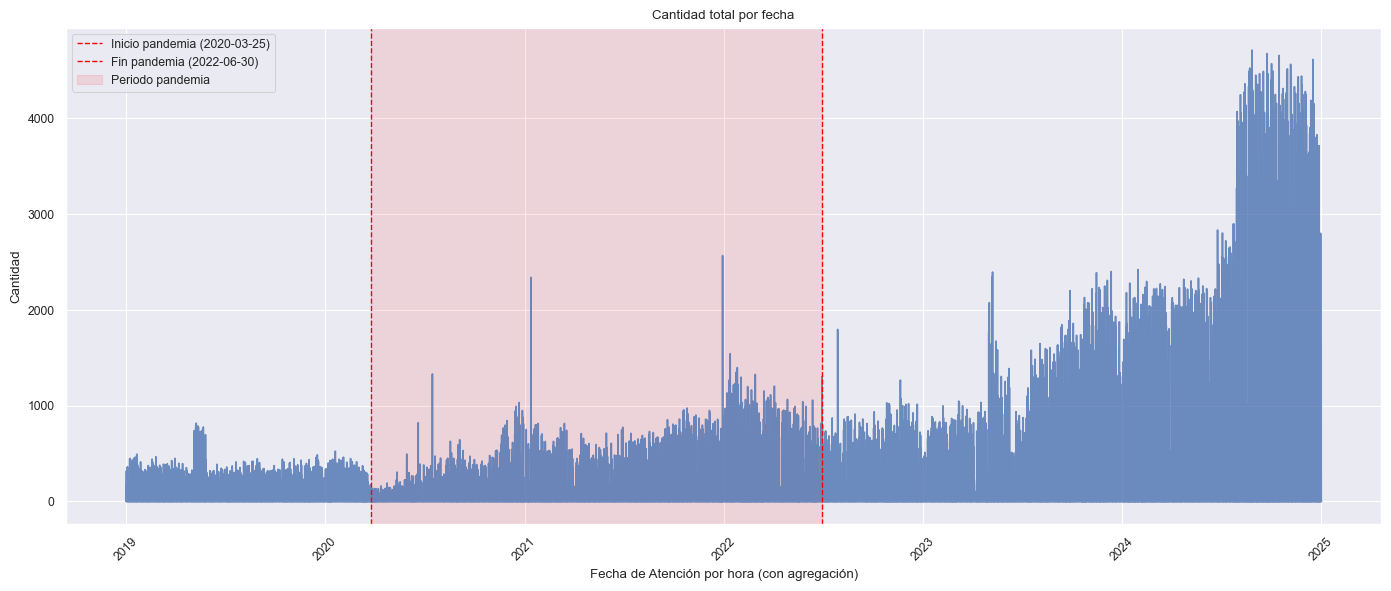

In [14]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()

# Ordenar por fecha (opcional)
serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

# Fechas de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# L√≠neas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del periodo
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Etiquetas y estilos
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por hora (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### üîç Interpretaci√≥n visual por partes

- üü¢ Tendencia general

    - Se observa una tendencia creciente desde 2019 hasta inicios de 2025.

    - Esto sugiere que el sistema, programa o fen√≥meno medido ha incrementado su actividad con el tiempo.

- üî¥ Picos espor√°dicos

    - Hay picos abruptos en ciertas fechas (valores fuera del patr√≥n normal). Estos pueden corresponder a:

    - Jornadas especiales (campa√±as de atenci√≥n, vacunaciones, etc.)

    - Eventos extraordinarios (crisis sanitaria, desastres, cambios normativos)

- üîµ Ca√≠das abruptas

    - Tambi√©n se observan valles o ca√≠das, especialmente alrededor del inicio de 2020.

    - Podr√≠an corresponder, por ejemplo, al inicio de la pandemia COVID-19 (25 de marzo de 2020 - 30 de junio de 2022) , cuando muchas actividades disminuyeron bruscamente.

- üü† Mayor volumen en los √∫ltimos a√±os

    - A partir de 2023 y m√°s a√∫n en 2024‚Äì2025, los valores suben notablemente.

    - Puede deberse a una expansi√≥n del sistema, mejor capacidad de reporte, o aumento real en la demanda de servicios registrados.

### Qu√© representa?

- Agrupa todos los registros por fecha (FECHA_ATENCION) y suma la cantidad total del d√≠a.

- Cada punto del gr√°fico representa la suma total de atenciones por d√≠a.

### üìà Interpretaci√≥n:

- Permite ver claramente la evoluci√≥n diaria en el tiempo.

- √ötil para analizar:

- Tendencias (¬øva en aumento o disminuci√≥n?)

- Efectos estacionales o eventos puntuales (por ejemplo, pandemia)

- D√≠as pico de atenci√≥n

### ‚úÖ Ventaja:

- Es m√°s legible.

- Se presta mejor para an√°lisis descriptivos y modelado de series temporales.


### üß† Se puede usar para:

- Analizar tendencia, ritmo, acumulaci√≥n de eventos por fecha	

- Hacer modelado, predicci√≥n, descomposici√≥n

### üí° Recomendaci√≥n para el Data Challenge:

- Usa esta figura como base principal para an√°lisis exploratorio y modelado. Luego, se puede:

- Graficar por semana o mes (resample('W') o resample('M'))

- Comparar municipios o tipos de atenci√≥n

- Detectar eventos an√≥malos (picos y ca√≠das)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por d√≠a (con agregaci√≥n sin hora)  üìã </p> 

### Tabla de frecuencias

Se usar√° `.dt.date` para extraer solo la fecha y agrupar por ella. Ahora s√≠ se ver√° una √∫nica fila por d√≠a, por ejemplo:

In [15]:
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']

In [16]:
serie_diaria.head(100)
#serie_diaria.tail(100)

FECHA  Cantidad
0   2019-01-01     114.0
1   2019-01-02    4982.0
2   2019-01-03    5637.0
3   2019-01-04    4703.0
4   2019-01-05    1656.0
..         ...       ...
95  2019-04-06    2372.0
96  2019-04-07     297.0
97  2019-04-08    7636.0
98  2019-04-09    7482.0
99  2019-04-10    6946.0

[100 rows x 2 columns]

In [17]:
#serie_diaria.head(100)
serie_diaria.tail(100)

FECHA  Cantidad
2092  2024-09-23   11880.0
2093  2024-09-24   11130.0
2094  2024-09-25   10488.0
2095  2024-09-26   10463.0
2096  2024-09-27    9191.0
...          ...       ...
2187  2024-12-27    8431.0
2188  2024-12-28    2846.0
2189  2024-12-29     390.0
2190  2024-12-30    7358.0
2191  2024-12-31    3765.0

[100 rows x 2 columns]

In [18]:
filas, columnas = serie_diaria.shape
print(f"N√∫mero de filas: {filas}")
print(f"N√∫mero de columnas: {columnas}")

N√∫mero de filas: 2192
N√∫mero de columnas: 2


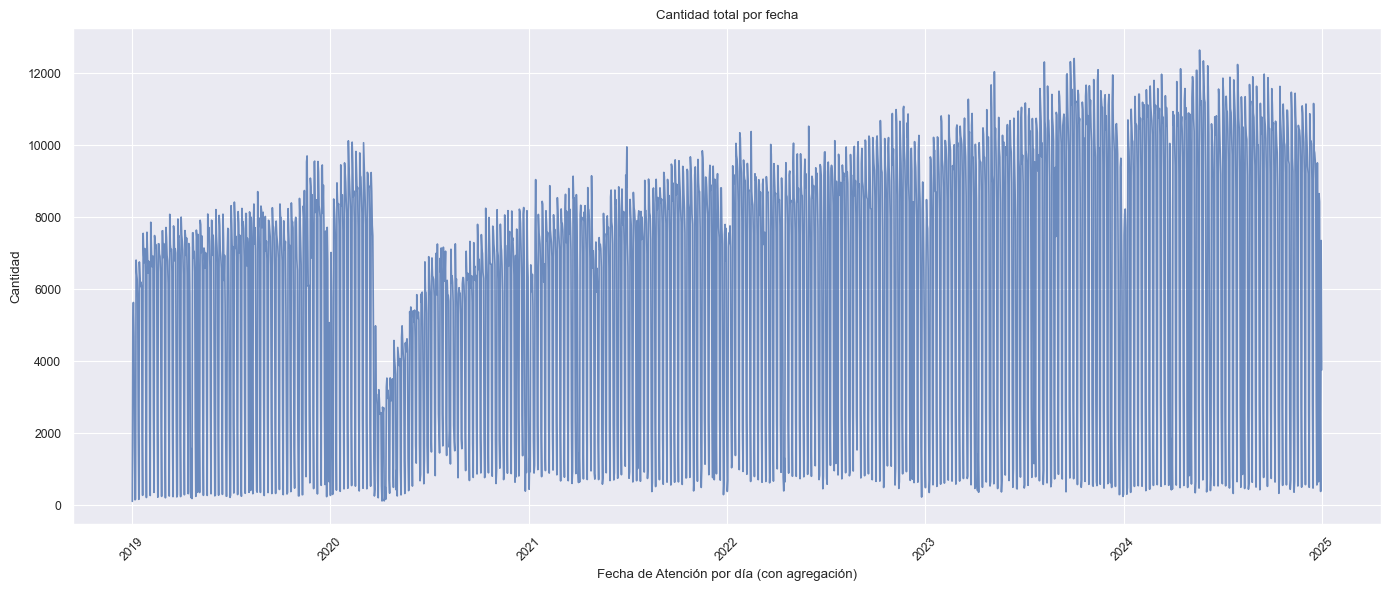

In [19]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por d√≠a (sin hora) y sumar la cantidad
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']

# Convertir FECHA de nuevo a datetime para graficar correctamente
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por d√≠a (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

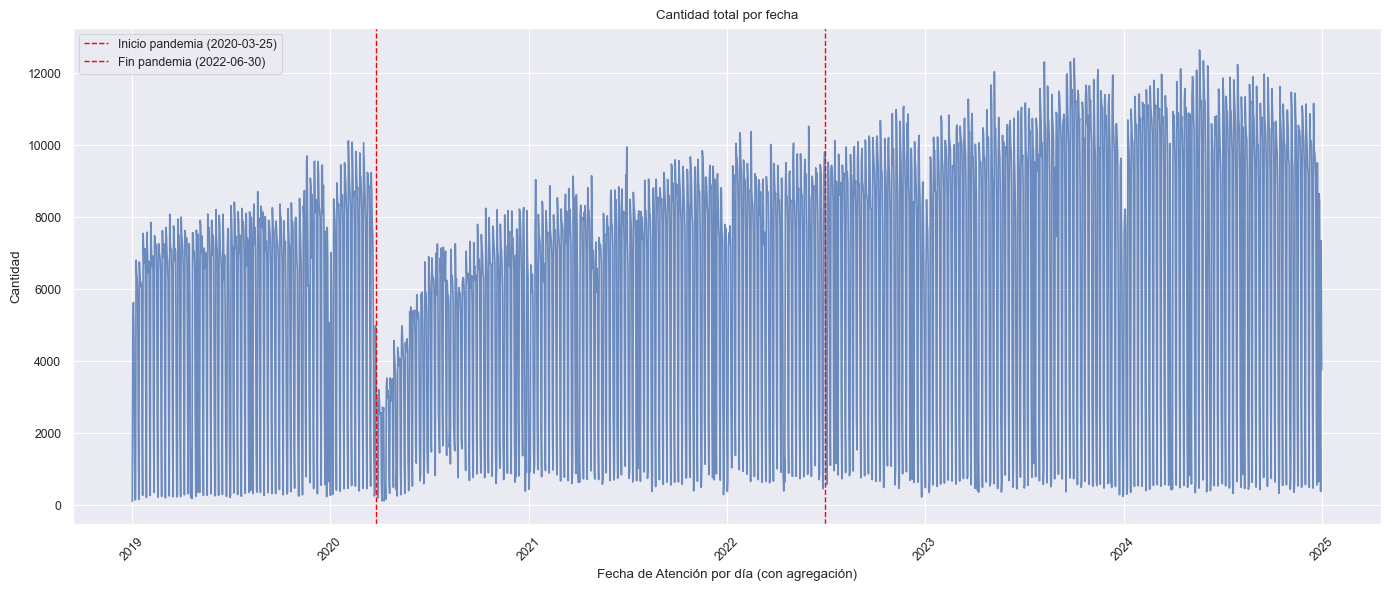

In [20]:
import pandas as pd 
import matplotlib.pyplot as plt

# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por d√≠a (sin hora) y sumar la cantidad
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']

# Convertir FECHA de nuevo a datetime para graficar correctamente
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# A√±adir l√≠neas verticales rojas
plt.axvline(pd.to_datetime('2020-03-25'), color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(pd.to_datetime('2022-06-30'), color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Est√©tica del gr√°fico
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por d√≠a (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


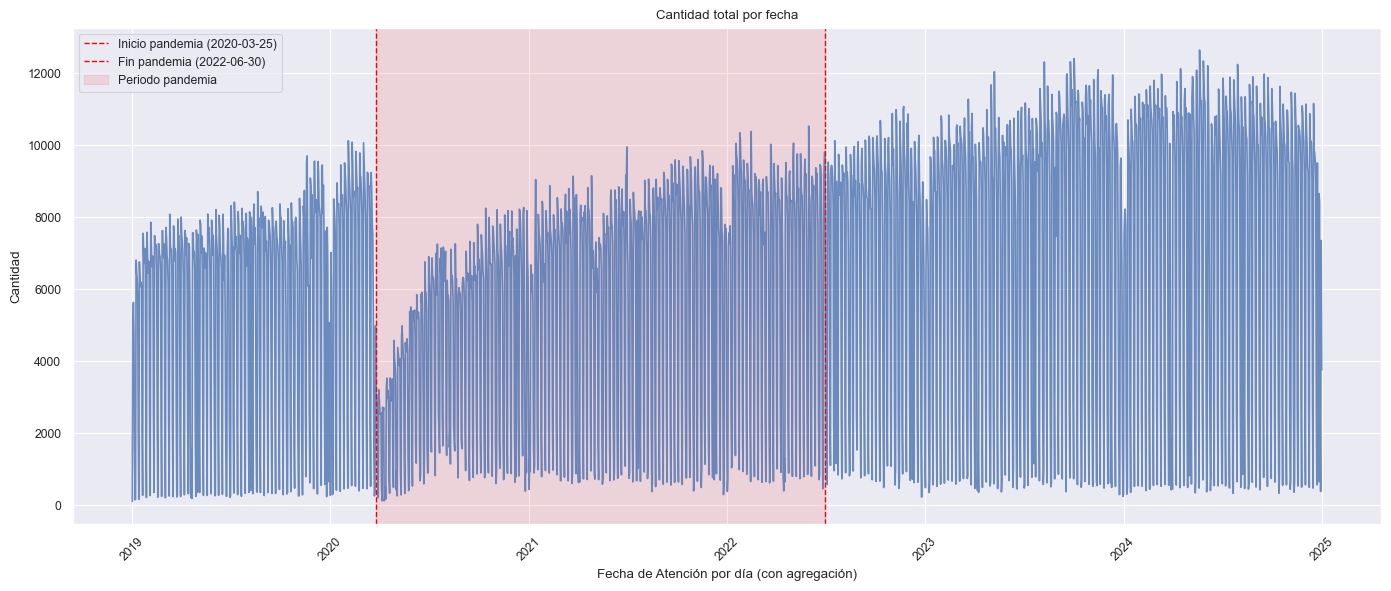

In [21]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por d√≠a (sin hora) y sumar la cantidad
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Fechas clave
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# L√≠neas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del per√≠odo de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Est√©tica del gr√°fico
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por d√≠a (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

### Explicaci√≥n

- Cada punto representa la suma total por d√≠a, sin desagregarse por horas.

- El eje X tendr√° un solo valor por fecha (por ejemplo: `2019-01-01`, `2019-01-02`, ...).

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por semana (con agregaci√≥n)  üìã </p>  

En la tabla, cada fila representar√° el total semanal de cantidad, con FECHA indicando el √∫ltimo d√≠a de la semana (domingo). El argumento `resample('W')` significa: "Agrupa todos los registros que caen en la misma semana (domingo a s√°bado)". Es decir, para cada semana, se sumaron todos los conteos diarios (`Cantidad`).

In [22]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por semana y sumar la cantidad
serie_semanal = df10.set_index('FECHA_ATENCION').resample('W')['Cantidad'].sum().reset_index()
serie_semanal.columns = ['FECHA', 'Cantidad']

# Agrupar por semana y sumar la cantidad
serie_semanal 

FECHA  Cantidad
0   2019-01-06   17249.0
1   2019-01-13   27720.0
2   2019-01-20   33816.0
3   2019-01-27   37515.0
4   2019-02-03   36978.0
..         ...       ...
309 2024-12-08   53246.0
310 2024-12-15   53456.0
311 2024-12-22   52942.0
312 2024-12-29   35765.0
313 2025-01-05   11123.0

[314 rows x 2 columns]

<Axes: xlabel='FECHA_ATENCION'>

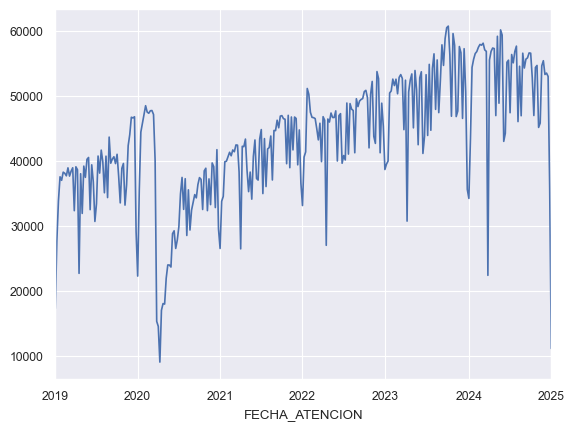

In [23]:
df10.set_index('FECHA_ATENCION').resample('W')['Cantidad'].sum().plot()

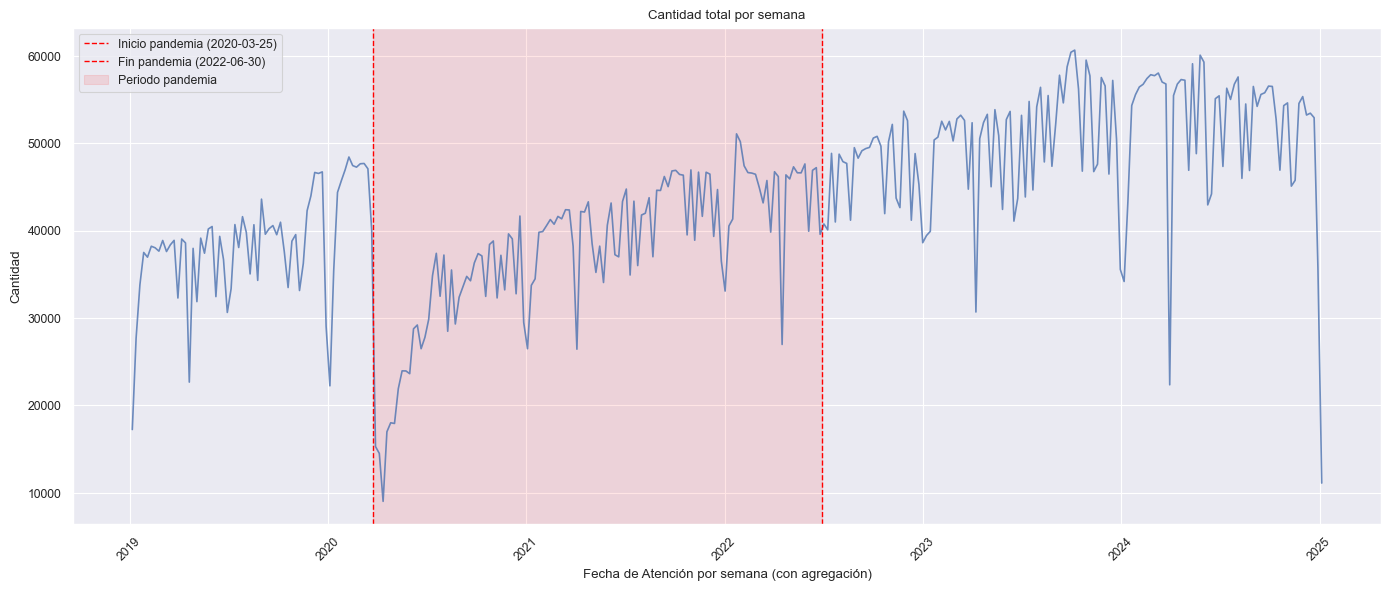

In [24]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por semana y sumar la cantidad
serie_semanal = df10.set_index('FECHA_ATENCION').resample('W')['Cantidad'].sum().reset_index()
serie_semanal.columns = ['FECHA', 'Cantidad']

# Ordenar por fecha
serie_semanal = serie_semanal.sort_values('FECHA')

# Fechas clave
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_semanal['FECHA'], serie_semanal['Cantidad'], linestyle='-', alpha=0.8)

# L√≠neas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del per√≠odo de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Est√©tica del gr√°fico
plt.title('Cantidad total por semana')
plt.xlabel('Fecha de Atenci√≥n por semana (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por mes (con agregaci√≥n)  üìã </p>  

En la tabla de abajo, cada fila representa la suma total de eventos del mes completo y La columna FECHA marca el √∫ltimo d√≠a de cada mes por defecto.

In [25]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por mes y sumar la cantidad
serie_mensual = df10.set_index('FECHA_ATENCION').resample('M')['Cantidad'].sum().reset_index()
serie_mensual.columns = ['FECHA', 'Cantidad']

serie_mensual

FECHA  Cantidad
0  2019-01-31  144191.0
1  2019-02-28  152444.0
2  2019-03-31  156689.0
3  2019-04-30  153408.0
4  2019-05-31  171004.0
..        ...       ...
67 2024-08-31  226411.0
68 2024-09-30  234274.0
69 2024-10-31  240938.0
70 2024-11-30  212874.0
71 2024-12-31  207110.0

[72 rows x 2 columns]

<Axes: xlabel='FECHA_ATENCION'>

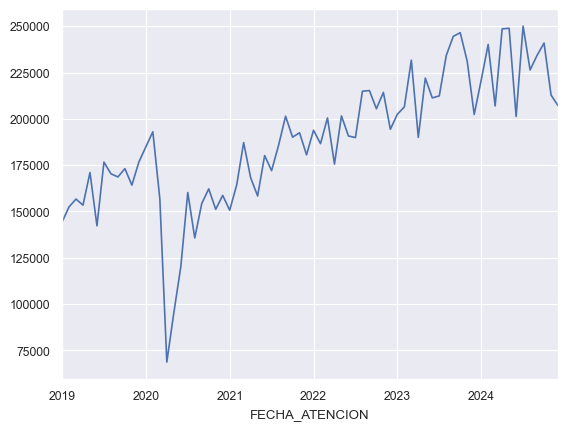

In [26]:
df10.set_index('FECHA_ATENCION').resample('M')['Cantidad'].sum().plot()

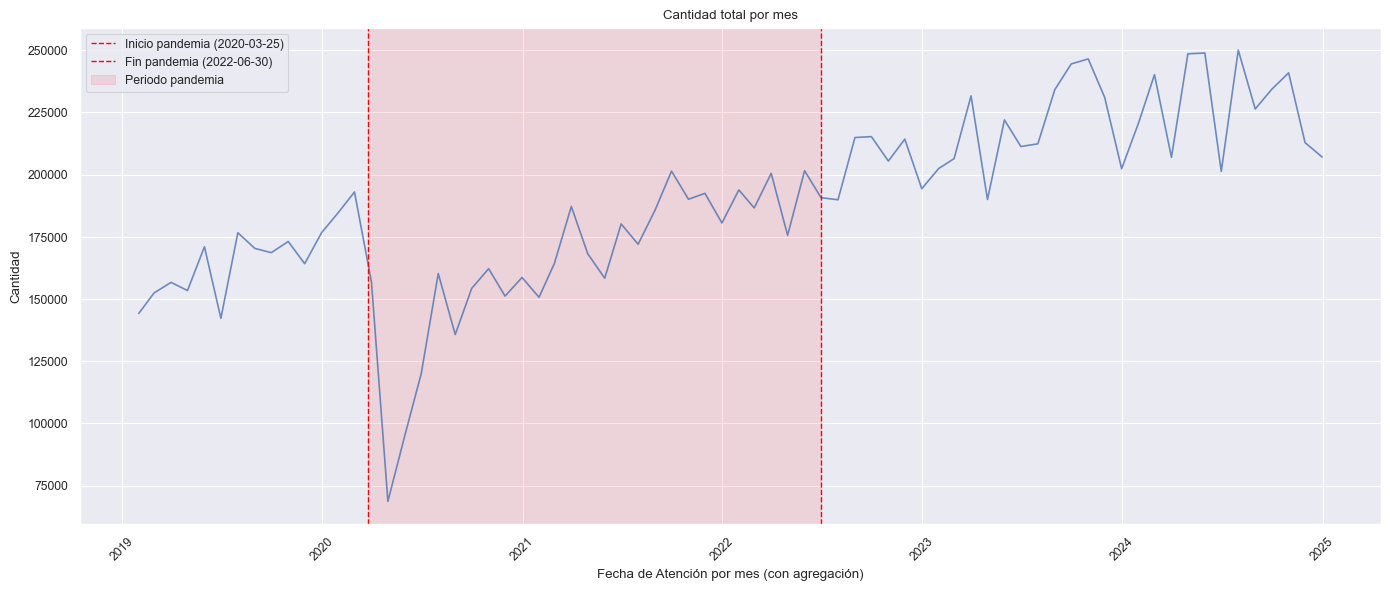

In [27]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por mes y sumar la cantidad
serie_mensual = df10.set_index('FECHA_ATENCION').resample('M')['Cantidad'].sum().reset_index()
serie_mensual.columns = ['FECHA', 'Cantidad']

# Ordenar por fecha
serie_mensual = serie_mensual.sort_values('FECHA')

# Fechas clave de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_mensual['FECHA'], serie_mensual['Cantidad'], linestyle='-', alpha=0.8)

# L√≠neas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del per√≠odo de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Est√©tica del gr√°fico
plt.title('Cantidad total por mes')
plt.xlabel('Fecha de Atenci√≥n por mes (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">3. Graficar directamente `FECHA_ATENCION` vs `Cantidad` por a√±o (con agregaci√≥n)  üìã </p>  

### üìå Notas

- Las fechas (FECHA) son el √∫ltimo d√≠a del a√±o (31 de diciembre).

- La sombra roja sigue activa y resalta los a√±os 2020, 2021 y parte de 2022.

- Este gr√°fico es ideal para comparar el impacto de la pandemia a nivel anual, visualizando claramente los efectos en el volumen de eventos registrados.

In [28]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por a√±o y sumar la cantidad
serie_anual = df10.set_index('FECHA_ATENCION').resample('Y')['Cantidad'].sum().reset_index()
serie_anual.columns = ['FECHA', 'Cantidad']

serie_anual

FECHA   Cantidad
0 2019-12-31  1949623.0
1 2020-12-31  1740888.0
2 2021-12-31  2131268.0
3 2022-12-31  2383136.0
4 2023-12-31  2635045.0
5 2024-12-31  2738499.0

<Axes: xlabel='FECHA_ATENCION'>

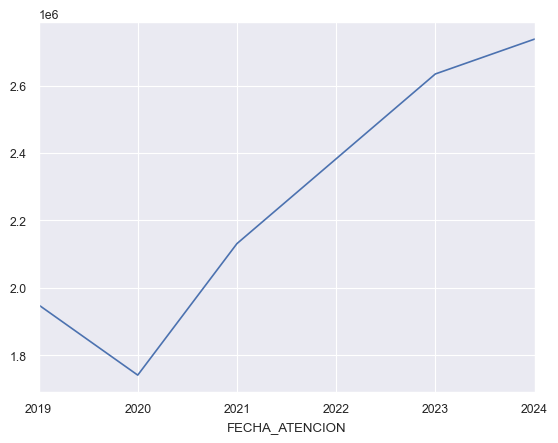

In [29]:
df10.set_index('FECHA_ATENCION').resample('Y')['Cantidad'].sum().plot()

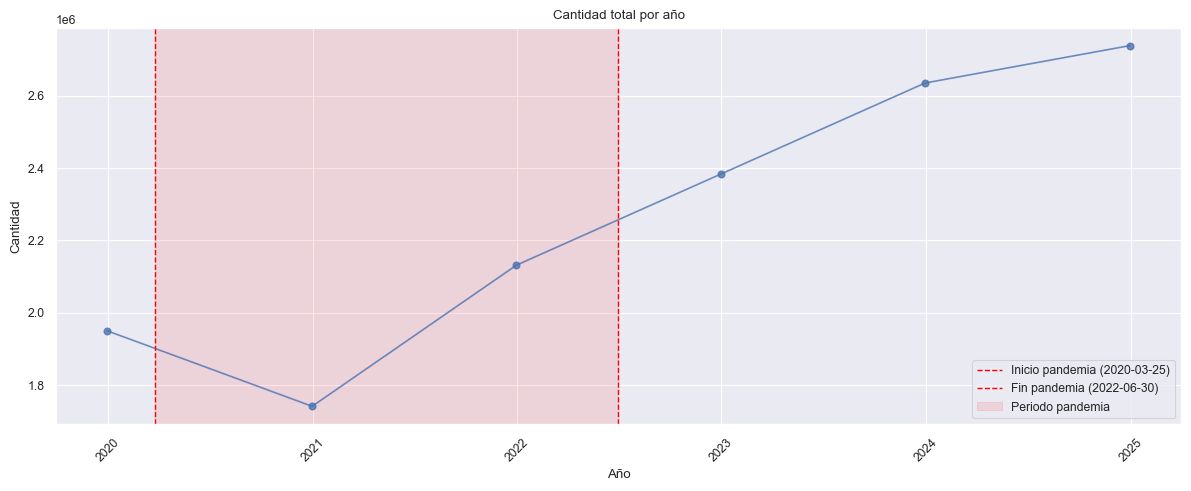

In [30]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por a√±o y sumar la cantidad
serie_anual = df10.set_index('FECHA_ATENCION').resample('Y')['Cantidad'].sum().reset_index()
serie_anual.columns = ['FECHA', 'Cantidad']

# Ordenar por fecha
serie_anual = serie_anual.sort_values('FECHA')

# Fechas clave de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(12, 5))
plt.plot(serie_anual['FECHA'], serie_anual['Cantidad'], marker='o', linestyle='-', alpha=0.8)

# L√≠neas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del per√≠odo de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Est√©tica del gr√°fico
plt.title('Cantidad total por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Serie de tiempo por d√≠a  üîç</p> 

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Revisando la tabla de frecuencias por d√≠a  üìã </p>  

In [31]:
# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad
#serie_diaria = df10.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()  # Por hora
serie_diaria = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a

serie_diaria

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

In [32]:
# Aseg√∫rate de tener el DataFrame df10 cargado con las columnas 'FECHA_ATENCION' y 'Cantidad'
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Calcular serie diaria y media m√≥vil
#serie_global = df10.groupby('FECHA_ATENCION')['Cantidad'].sum() # Por hora
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum() # Por d√≠a

serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

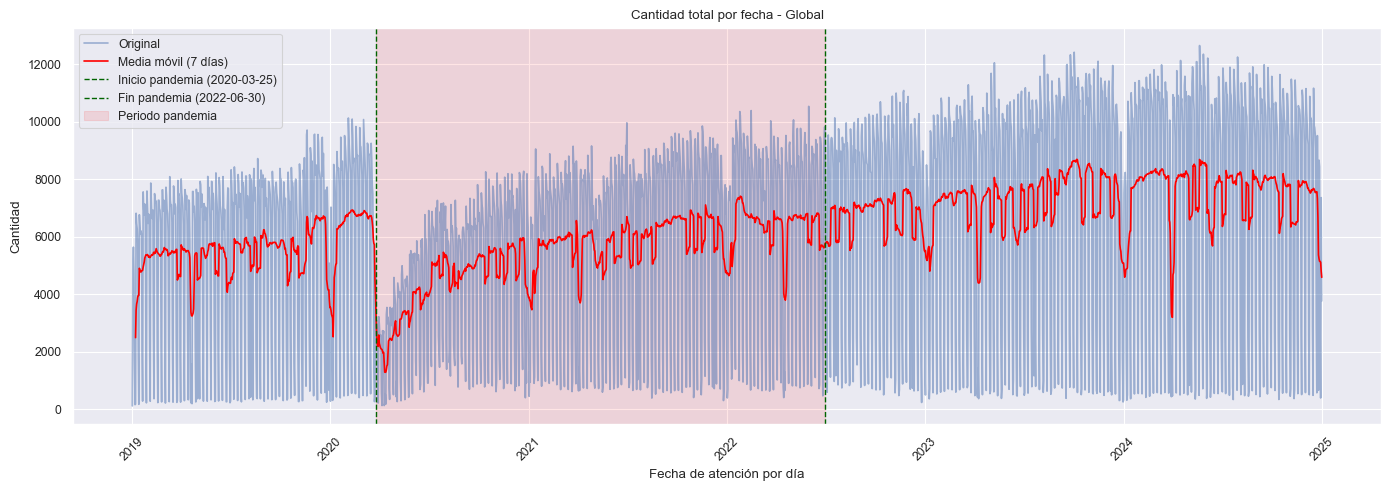

In [33]:
# Aseg√∫rate de tener el DataFrame df10 cargado con las columnas 'FECHA_ATENCION' y 'Cantidad'
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Calcular serie diaria y media m√≥vil
#serie_global = df10.groupby('FECHA_ATENCION')['Cantidad'].sum() # Por hora
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a

rolling_7 = serie_global.rolling(window=7).mean()

# Fechas del periodo de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 5))
plt.plot(serie_global.index, serie_global.values, label='Original', alpha=0.5)
plt.plot(rolling_7.index, rolling_7.values, label='Media m√≥vil (7 d√≠as)', color='red')

# L√≠neas verticales y sombreado del periodo de pandemia
plt.axvline(inicio_pandemia, color='darkgreen', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='darkgreen', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Detalles est√©ticos
plt.title('Cantidad total por fecha - Global')
plt.xlabel('Fecha de atenci√≥n por d√≠a')
plt.ylabel('Cantidad')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### üìä ¬øQu√© muestra el gr√°fico?

- Curva azul (Original): Es la suma total diaria de eventos (Cantidad) registrados para cada FECHA_ATENCION. Muestra bastante variabilidad diaria.

- Curva roja (Media m√≥vil de 7 d√≠as): Es un suavizado que permite observar la tendencia subyacente, eliminando ruido de corto plazo. Cada punto representa el promedio de los √∫ltimos 7 d√≠as.


### üîç ¬øC√≥mo se interpreta?

- Tendencia general ascendente: Desde 2019 hasta 2025, la curva roja muestra un crecimiento notable, con un cambio claro post-pandemia.

- Picos aislados: La curva azul muestra algunos picos abruptos, que pueden corresponder a eventos an√≥malos, fallos de carga de datos o situaciones cr√≠ticas (como campa√±as masivas de atenci√≥n o siniestros).

- Pandemia y post-pandemia: Se podr√≠a notar:

    - Una ca√≠da durante el inicio de la pandemia (por restricciones)

    - Un rebote posterior (acumulaci√≥n de casos o reactivaci√≥n de servicios)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cambio estructural (antes vs. despu√©s pandemia)  üìã </p>  

In [34]:
# Convertir a datetime.date la fecha de comparaci√≥n
fecha_corte = datetime.strptime('2020-03-25', '%Y-%m-%d').date()

# Separar series
pre = serie_global[serie_global.index < fecha_corte]
post = serie_global[serie_global.index >= fecha_corte]

# Verificar los primeros valores
print(pre.head())
print(post.head())

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
Name: Cantidad, dtype: float64
FECHA_ATENCION
2020-03-25    3051.0
2020-03-26    3085.0
2020-03-27    2802.0
2020-03-28     709.0
2020-03-29     215.0
Name: Cantidad, dtype: float64


In [35]:
from scipy.stats import ttest_ind
stat, p = ttest_ind(pre.dropna(), post.dropna())
print("p-valor:", p)

p-valor: 8.622603620475699e-06


La prueba t (ttest_ind) aplicada compara el promedio de eventos registrados antes y despu√©s del 25 de marzo de 2020, fecha que marca el inicio de la pandemia en Colombia.

üìä Hip√≥tesis de la prueba t de Student (independiente)

- H‚ÇÄ (hip√≥tesis nula): No hay diferencia en el promedio diario de eventos antes y despu√©s de la pandemia (medias iguales).

- H‚ÇÅ (hip√≥tesis alternativa): S√≠ hay una diferencia significativa en los promedios diarios (las medias son distintas).

üîç Resultado
- p-valor: 8.6e-06. Es decir, 0.000 (extremadamente bajo).

‚úÖ Interpretaci√≥n

- Con un p-valor tan peque√±o (muy por debajo de cualquier umbral t√≠pico como 0.05 o incluso 0.001), se rechaza contundentemente la hip√≥tesis nula.

üî¥ Esto indica que el promedio diario de eventos cambi√≥ significativamente despu√©s del inicio de la pandemia.

In [36]:
print("Promedio antes:", pre.mean())
print("Promedio despu√©s:", post.mean())

Promedio antes: 5497.41425389755
Promedio despu√©s: 6374.136546184739


<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Cambio en la varianza (antes, durante y despu√©s de la pandemia) üìã </p>  

In [37]:
from scipy.stats import levene, bartlett

# Aseg√∫rate de que FECHA_ATENCION sea datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

El an√°lisis eval√∫a si hubo cambios en la variabilidad (varianza) de los datos diarios antes, durante y despu√©s de la pandemia. 

üß† Hip√≥tesis de ambas pruebas (Levene y Bartlett)
- H‚ÇÄ (hip√≥tesis nula): Las varianzas de los tres periodos (pre, durante, post) son iguales.

- H‚ÇÅ (hip√≥tesis alternativa): Al menos una varianza es diferente (es decir, hubo un cambio en la variabilidad diaria).

In [38]:
# Aseg√∫rate de que FECHA_ATENCION sea datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
serie_global.index = pd.to_datetime(serie_global.index)  # Convertir a datetime

# Definir periodos como datetime tambi√©n
inicio = pd.to_datetime("2020-03-25")
fin = pd.to_datetime("2022-06-30")

# Separar periodos correctamente
pre = serie_global[serie_global.index < inicio]
durante = serie_global[(serie_global.index >= inicio) & (serie_global.index <= fin)]
post = serie_global[serie_global.index > fin]

# Aplicar pruebas de varianza
stat_lev, p_lev = levene(pre, durante, post)
stat_bart, p_bart = bartlett(pre, durante, post)

# Mostrar resultados
print(f"Levene: p-value = {p_lev:.4f}")
print(f"Bartlett: p-value = {p_bart:.4f}")

Levene: p-value = 0.0000
Bartlett: p-value = 0.0000


‚úÖ Interpretaci√≥n

- Existe evidencia estad√≠sticamente significativa para afirmar que la variabilidad (fluctuaci√≥n) diaria de la cantidad cambi√≥ durante la pandemia. 


En otras palabras:

‚ö†Ô∏è No solo cambi√≥ el promedio diario, sino tambi√©n la dispersi√≥n o estabilidad del comportamiento diario.

### üìå ¬øQu√© sigue?

Explorar cu√°l periodo tiene mayor varianza, por ejemplo con:

In [39]:
print("Pre:", pre.var())
print("Durante:", durante.var())
print("Post:", post.var())

Pre: 10045040.185153518
Durante: 10154525.093031673
Post: 17435831.54616589


In [40]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()
serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

Como la varianza durante la pandemia es mucho mayor, podr√≠amos concluir que el sistema (o atenci√≥n m√©dica) se volvi√≥ m√°s inestable o impredecible en ese tiempo.

El gr√°fico de abajo permitir√° visualizar no solo los promedios diarios en cada etapa, sino tambi√©n cu√°n consistentes o variables fueron esos promedios.

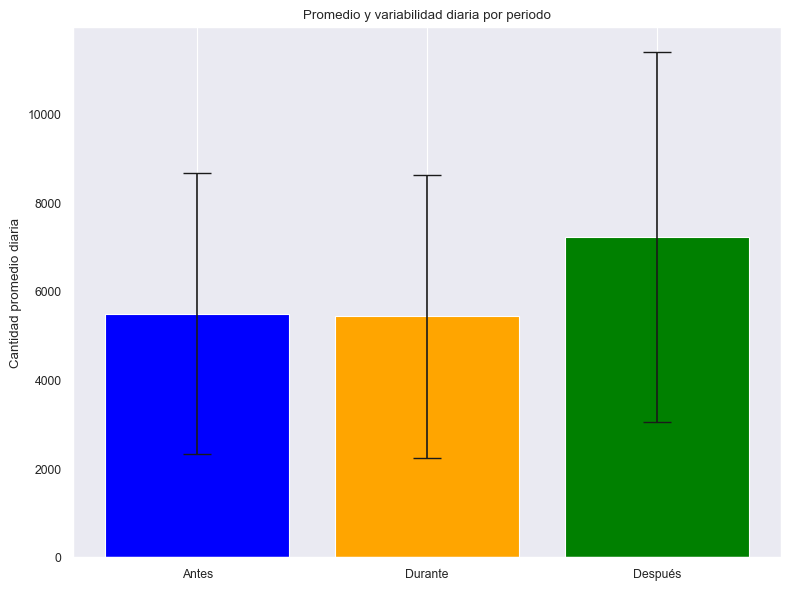

In [41]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora
serie_global.index = pd.to_datetime(serie_global.index)  # Convertir √≠ndice a datetime

# Definir periodos
inicio = pd.to_datetime("2020-03-25")
fin = pd.to_datetime("2022-06-30")

# Separar las series por periodo
pre = serie_global[serie_global.index < inicio]
durante = serie_global[(serie_global.index >= inicio) & (serie_global.index <= fin)]
post = serie_global[serie_global.index > fin]

# Calcular medias y desviaciones est√°ndar
labels = ['Antes', 'Durante', 'Despu√©s']
medias = [pre.mean(), durante.mean(), post.mean()]
stds = [pre.std(), durante.std(), post.std()]

# Crear gr√°fico de barras con barras de error (desviaci√≥n est√°ndar)
plt.figure(figsize=(8, 6))
plt.bar(labels, medias, yerr=stds, capsize=10, color=['blue', 'orange', 'green'])
plt.title('Promedio y variabilidad diaria por periodo')
plt.ylabel('Cantidad promedio diaria')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

### Interpretaci√≥n del gr√°fico

- El gr√°fico de barras con l√≠neas de error muestra el promedio diario de eventos registrados en tres periodos: antes, durante y despu√©s de la pandemia. 

- Las barras representan el valor promedio de la variable `Cantidad` en cada periodo, mientras que las l√≠neas verticales (barras de error) indican la variabilidad de esos valores a trav√©s de su desviaci√≥n est√°ndar. 

- Aunque los promedios parecen similares entre los tres periodos, la variabilidad se incrementa dr√°sticamente despu√©s de la pandemia, como se observa en la l√≠nea m√°s larga en el periodo `Despu√©s`. 

- Esto sugiere que, aunque el n√∫mero promedio de registros diarios se mantuvo relativamente estable, la inconsistencia o dispersi√≥n en los datos aument√≥ considerablemente tras la pandemia, lo que podr√≠a estar asociado a cambios estructurales o de comportamiento en el sistema de atenci√≥n.

In [42]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

### Hip√≥tesis

Hip√≥tesis nula (H‚ÇÄ): La serie no es estacionaria (tiene ra√≠z unitaria).

Hip√≥tesis alternativa (H‚ÇÅ): La serie es estacionaria.


### ¬øPara qu√© sirve?

Verifica si tu serie es estacionaria (es decir, si sus propiedades estad√≠sticas no cambian en el tiempo).

‚úÖ Si el p-valor < 0.05, la serie es estacionaria.  En este caso, SI lo es. 

In [43]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

#La prueba de Dickey-Fuller aumentada
from statsmodels.tsa.stattools import adfuller

resultado_adf = adfuller(serie_global.dropna())
print(f'Estad√≠stico ADF: {resultado_adf[0]:.4f}')
print(f'p-valor: {resultado_adf[1]:.4f}')

Estad√≠stico ADF: -3.9977
p-valor: 0.0014


### Interpretaci√≥n

- La prueba de Dickey-Fuller aumentada (ADF) aplicada a la serie temporal de la variable Cantidad muestra un estad√≠stico ADF de -3.9977 y un valor-p de 0.0014. 

- Este valor-p es significativamente menor al nivel de significancia com√∫n (por ejemplo, 0.05), lo que nos permite rechazar la hip√≥tesis nula de que la serie tiene una ra√≠z unitaria. Es decir, rechazamos la idea de que no es estacionaria. 

- En consecuencia, se concluye que la serie temporal es estacionaria, lo cual significa que sus propiedades estad√≠sticas (como la media y la varianza) se mantienen constantes a lo largo del tiempo. 

- Esta caracter√≠stica es fundamental para la aplicaci√≥n de modelos de series temporales m√°s avanzados como ARIMA.

In [44]:
from statsmodels.tsa.stattools import adfuller

def interpretar_adf(serie, nombre):
    resultado = adfuller(serie.dropna())
    estadistico = resultado[0]
    pvalor = resultado[1]
    print(f"Resultados ADF - {nombre}")
    print("===================================")
    print(f"Estad√≠stico ADF: {estadistico:.4f}")
    print(f"Valor p: {pvalor:.4f}")
    if pvalor < 0.05:
        print("‚úÖ Rechazamos H‚ÇÄ ‚Üí La serie es estacionaria.\n")
    else:
        print("‚ùå No se rechaza H‚ÇÄ ‚Üí La serie NO es estacionaria.\n")

# Aplicar ADF a la serie original y sus diferencias
interpretar_adf(serie_global, "Serie Original")
interpretar_adf(serie_global.diff(), "Primera Diferencia")
interpretar_adf(serie_global.diff().diff(), "Segunda Diferencia")

Resultados ADF - Serie Original
Estad√≠stico ADF: -3.9977
Valor p: 0.0014
‚úÖ Rechazamos H‚ÇÄ ‚Üí La serie es estacionaria.

Resultados ADF - Primera Diferencia
Estad√≠stico ADF: -15.1719
Valor p: 0.0000
‚úÖ Rechazamos H‚ÇÄ ‚Üí La serie es estacionaria.

Resultados ADF - Segunda Diferencia
Estad√≠stico ADF: -18.2211
Valor p: 0.0000
‚úÖ Rechazamos H‚ÇÄ ‚Üí La serie es estacionaria.



La prueba de Dickey-Fuller aumentada (ADF) fue aplicada a la serie original 'Cantidad', as√≠ como a sus primeras y segundas diferencias, con el prop√≥sito de evaluar su estacionariedad. Los resultados obtenidos muestran que la serie original ya es estacionaria, dado que el valor del estad√≠stico ADF fue de -3.9977 y el valor p correspondiente fue 0.0014. Este valor p es inferior al umbral de significancia del 5%, lo que permite rechazar la hip√≥tesis nula de no estacionariedad. En consecuencia, no es necesario aplicar diferenciaci√≥n para estabilizar la media del proceso.

Cuando se aplic√≥ la primera diferencia, el estad√≠stico ADF alcanz√≥ un valor de -15.1719, con un valor p de 0.0000, confirmando tambi√©n la estacionariedad de la serie transformada. Sin embargo, dado que la serie original ya era estacionaria, esta transformaci√≥n no es estrictamente necesaria, aunque s√≠ reafirma la estabilidad del comportamiento a trav√©s del tiempo.

Por √∫ltimo, la segunda diferencia arroj√≥ un estad√≠stico ADF de -18.2211 con un valor p de 0.0000. Aunque estos resultados tambi√©n reflejan una serie estacionaria, aplicar una segunda diferenciaci√≥n puede resultar en una sobrediferenciaci√≥n que elimine componentes estructurales √∫tiles para el modelado. Esto podr√≠a reducir la capacidad del modelo para capturar patrones relevantes presentes en los datos originales.

En s√≠ntesis, la serie `Cantidad` es estacionaria desde su forma original, por lo que es apropiado utilizar un modelo ARIMA con par√°metro de diferenciaci√≥n d=0. Evitar diferenciaciones innecesarias mejora la precisi√≥n del modelo y simplifica su interpretaci√≥n.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">‚öôÔ∏è Dickey-Fuller y Prueba de nortmalidad (c√≥digo de Keyla Alba) üìã </p>  

Prueba de Dickey-Fuller Aumentada (ADF) - Residuos
Estad√≠stico ADF: -19.3133
Valor p: 0.0000
Se rechaza H‚ÇÄ ‚Üí Los residuos son estacionarios.

Prueba de Shapiro-Wilk - Normalidad de los Residuos
Estad√≠stico: 0.8390
Valor p: 0.0000
H‚ÇÄ: Los residuos siguen una distribuci√≥n normal
H‚ÇÅ: Los residuos NO siguen una distribuci√≥n normal
Se rechaza H‚ÇÄ ‚Üí Los residuos no son normales.



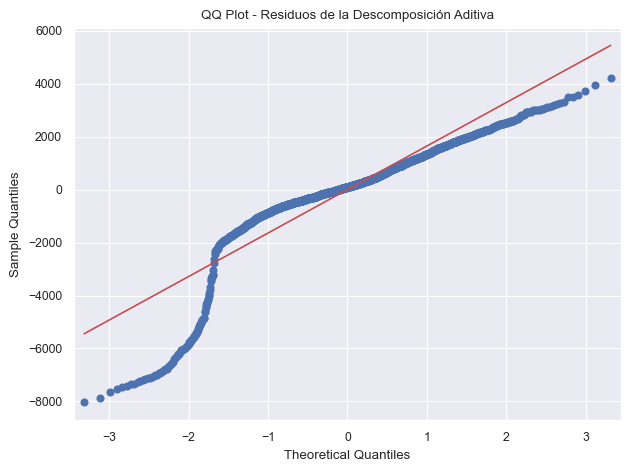

In [45]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from scipy.stats import shapiro
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

# Descomposici√≥n aditiva (si no la has hecho)
descomposicion = seasonal_decompose(serie_global, model='additive', period=7)
resid = descomposicion.resid.dropna()

# Prueba de Dickey-Fuller Aumentada (ADF) sobre los residuos
adf_result = adfuller(resid)
print("Prueba de Dickey-Fuller Aumentada (ADF) - Residuos")
print(f"Estad√≠stico ADF: {adf_result[0]:.4f}")
print(f"Valor p: {adf_result[1]:.4f}")
if adf_result[1] < 0.05:
    print("Se rechaza H‚ÇÄ ‚Üí Los residuos son estacionarios.\n")
else:
    print("No se puede rechazar H‚ÇÄ ‚Üí Los residuos no son estacionarios.\n")

# Prueba de normalidad de Shapiro-Wilk
shapiro_test = shapiro(resid)
print("Prueba de Shapiro-Wilk - Normalidad de los Residuos")
print(f"Estad√≠stico: {shapiro_test.statistic:.4f}")
print(f"Valor p: {shapiro_test.pvalue:.4f}")
print("H‚ÇÄ: Los residuos siguen una distribuci√≥n normal")
print("H‚ÇÅ: Los residuos NO siguen una distribuci√≥n normal")
if shapiro_test.pvalue < 0.05:
    print("Se rechaza H‚ÇÄ ‚Üí Los residuos no son normales.\n")
else:
    print("No se rechaza H‚ÇÄ ‚Üí Los residuos pueden considerarse normales.\n")

# QQ Plot para visualizar la normalidad de los residuos
sm.qqplot(resid, line='s')
plt.title("QQ Plot - Residuos de la Descomposici√≥n Aditiva")
plt.grid(True)
plt.tight_layout()
plt.show()

**Prueba de Dickey-Fuller Aumentada (ADF) - Residuos**

El valor del estad√≠stico ADF es -19.3133 y el valor p es 0.0000. Esto indica que se rechaza la hip√≥tesis nula (H‚ÇÄ) de que los residuos presentan una ra√≠z unitaria, es decir, de que no son estacionarios. Por lo tanto, se concluye que los residuos s√≠ son estacionarios, lo cual es un requisito importante para validar un modelo ARIMA. En este sentido, el comportamiento de los residuos no presenta una tendencia sistem√°tica y fluct√∫a alrededor de una media constante con varianza constante en el tiempo.

**Prueba de Shapiro-Wilk - Normalidad de los Residuos**

El estad√≠stico de Shapiro-Wilk es 0.8390 y el valor p es 0.0000. En este caso, se rechaza la hip√≥tesis nula (H‚ÇÄ) de que los residuos siguen una distribuci√≥n normal. Es decir, los residuos no se distribuyen normalmente, lo que puede indicar la presencia de asimetr√≠a, valores extremos (outliers), o colas pesadas.

**Conclusi√≥n General**

Aunque los residuos del modelo son estacionarios (lo cual es una condici√≥n deseable en modelos ARIMA para garantizar que las predicciones no est√©n sesgadas), no cumplen con el supuesto de normalidad, lo que podr√≠a limitar algunas inferencias estad√≠sticas asociadas al modelo. Sin embargo, en muchos casos pr√°cticos, la no normalidad de los residuos no invalida el modelo predictivo, especialmente si los residuos no presentan autocorrelaci√≥n y tienen media cercana a cero. No obstante, este hallazgo puede justificar una exploraci√≥n m√°s profunda, como aplicar transformaciones (por ejemplo, logar√≠tmica) o considerar modelos robustos si se requiere mayor precisi√≥n en la estimaci√≥n de intervalos de confianza.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üîÅ Modelo multiplicativo (c√≥digo de Keyla ALba) üìã </p>  

La descomposici√≥n multiplicativa de la serie temporal `Cantidad` permite identificar la estructura interna de la serie al dividirla en sus componentes: tendencia, estacionalidad y residuo. A diferencia de la descomposici√≥n aditiva, esta t√©cnica asume que las fluctuaciones estacionales y aleatorias son proporcionales al nivel de la serie, por lo cual se usa cuando la variabilidad aumenta con el tiempo.

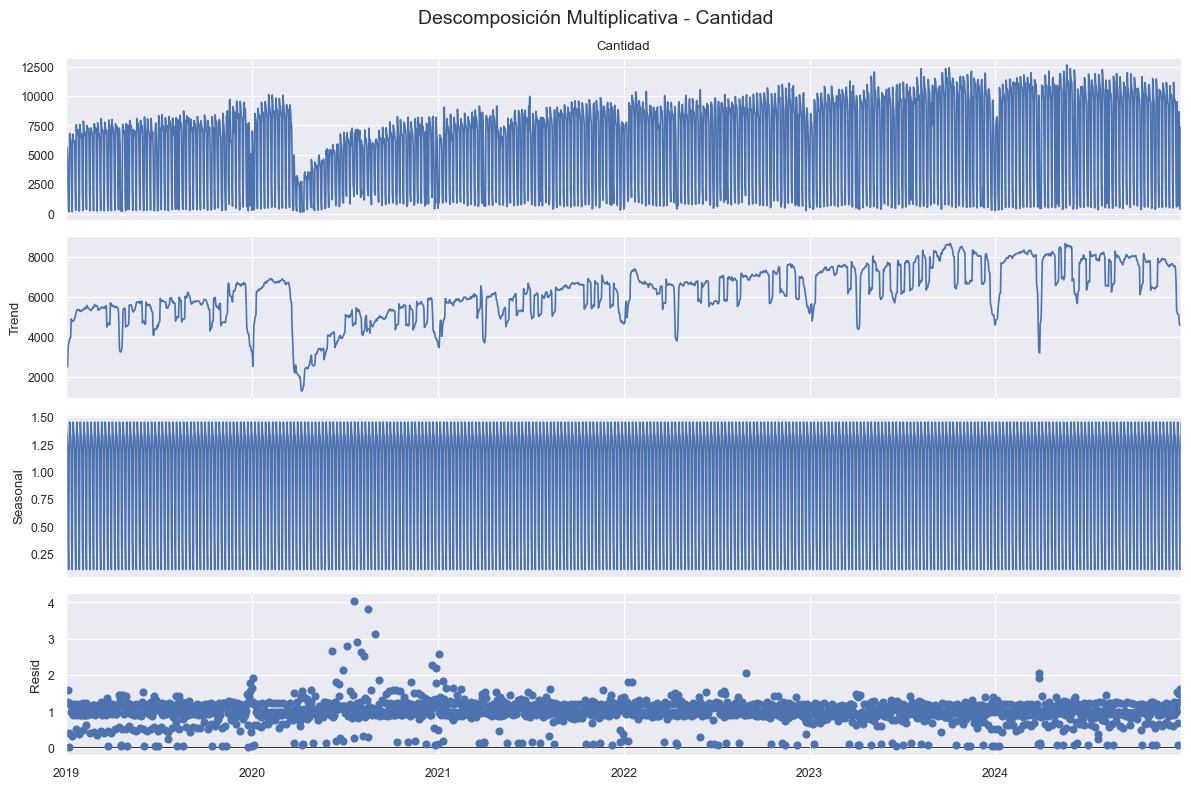

In [46]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aseg√∫rate de que el √≠ndice est√© en datetime y con frecuencia diaria
serie = serie_global.copy()
serie.index = pd.to_datetime(serie.index)
serie = serie.asfreq('D')  # establece frecuencia diaria
serie = serie.interpolate(method='linear')  # rellena valores faltantes si hay

# Descomposici√≥n estacional multiplicativa
decompose_mult = seasonal_decompose(serie, model='multiplicative', period=7)  # puedes ajustar el periodo seg√∫n la estacionalidad esperada

# Visualizaci√≥n
fig_mult = decompose_mult.plot()
fig_mult.set_size_inches(12, 8)
fig_mult.suptitle('Descomposici√≥n Multiplicativa - Cantidad', fontsize=14)
plt.tight_layout()
plt.show()

### üîç Interpretaci√≥n de los resultados

1. Serie observada:
La serie original muestra un comportamiento altamente fluctuante, con niveles de "Cantidad" que se incrementan progresivamente a lo largo del tiempo. Se observan ciclos irregulares, ca√≠das puntuales abruptas (como las de 2020 y 2023), y una variabilidad que parece aumentar en los a√±os m√°s recientes. Esto sugiere una relaci√≥n no lineal entre la tendencia y las variaciones.

2. Componente de tendencia:
La tendencia suavizada revela una estructura creciente a lo largo del tiempo, aunque interrumpida por ca√≠das notables. Esta evoluci√≥n estructural indica cambios importantes en la din√°mica de los eventos observados, posiblemente por factores externos como cambios normativos, choques sanitarios o administrativos que afectaron el comportamiento.

3. Componente estacional:
La estacionalidad en el modelo multiplicativo se expresa como proporciones del nivel de la serie, y en este caso, oscila entre valores cercanos a 0.2 y 1.5, lo que implica que las variaciones estacionales tienen un efecto relativo importante y constante sobre el total. Este patr√≥n sugiere la presencia de ciclos repetitivos diarios o semanales (dado el periodo utilizado), reflejando posiblemente comportamientos institucionales, laborales o de atenci√≥n peri√≥dica.

4. Componente residual:
Los residuos muestran valores concentrados en torno a 1, aunque existen picos que superan los valores normales (hasta ~4), indicando eventos no explicados ni por la tendencia ni por la estacionalidad. Esto puede deberse a alteraciones abruptas, errores de registro o eventos at√≠picos.

### üìå ¬øPara qu√© se hace esta prueba?

Esta descomposici√≥n es clave para determinar el tipo de modelo a utilizar en el an√°lisis y pron√≥stico de series temporales:

- Si las variaciones estacionales son proporcionales al nivel (como en este caso), entonces el modelo multiplicativo es adecuado.

- Si las variaciones estacionales fueran independientes del nivel de la serie, entonces un modelo aditivo ser√≠a preferible.

Adem√°s, separar los componentes permite identificar claramente si existen cambios estructurales, patrones repetitivos y anomal√≠as, lo cual mejora la interpretaci√≥n y la selecci√≥n de modelos como ARIMA, SARIMA o modelos de suavizamiento exponencial.

### ‚úÖ 2. Comportamiento de la serie y descomposici√≥n:

- La descomposici√≥n aditiva mostr√≥ estacionalidad no proporcional al nivel de la serie y residuos centrados en cero, lo que sugiere buen ajuste.

- La descomposici√≥n multiplicativa, en cambio, mostr√≥ estacionalidad proporcional (variaciones entre 0.2 y 1.5) y residuos multiplicativos en torno a 1. Esto no es coherente con una serie estacionaria.

### üëâ Conclusi√≥n: 

El modelo aditivo es m√°s apropiado para representar la estructura de la serie.




<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üîÅ Autocorrelaci√≥n y Autocorrelaci√≥n Parcial üìã </p>  

¬øPara qu√© sirve?

Detecta dependencias entre valores pasados. Te ayuda a definir par√°metros para ARIMA (AR, MA, etc.).

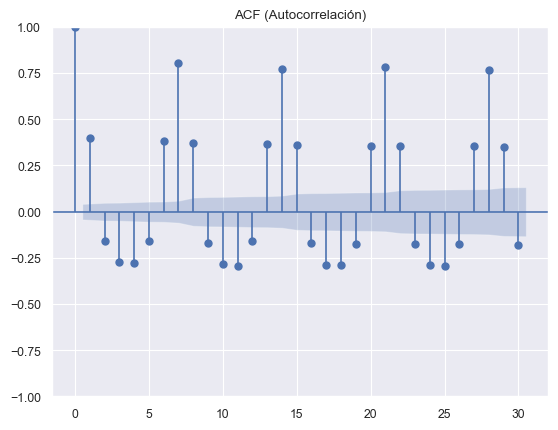

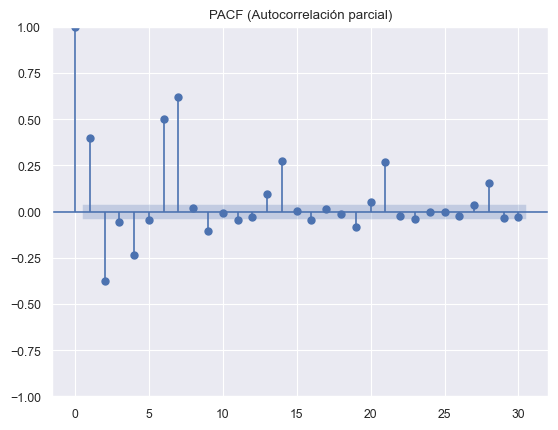

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(serie_global.dropna(), lags=30)
plt.title("ACF (Autocorrelaci√≥n)")
plt.show()

plot_pacf(serie_global.dropna(), lags=30)
plt.title("PACF (Autocorrelaci√≥n parcial)")
plt.show()

### üî¢ Interpretaci√≥n

- Las gr√°ficas de ACF (Autocorrelaci√≥n) y PACF (Autocorrelaci√≥n Parcial) permiten explorar la estructura temporal de la serie. 

- En la primera gr√°fica (ACF), se observa una autocorrelaci√≥n significativa en varios rezagos, lo cual sugiere que los valores actuales est√°n correlacionados con los valores de d√≠as anteriores, indicando persistencia en el comportamiento de la serie. 

    - Se observa que ACF decae lentamente ‚Üí evidencia de componente MA.

- La segunda gr√°fica (PACF) muestra que la autocorrelaci√≥n parcial es significativa en los primeros rezagos (especialmente en los primeros cinco d√≠as), lo que sugiere que un modelo autorregresivo (AR) de bajo orden podr√≠a ser adecuado para modelar la serie. 

    - Con PACF se observa un  corte despu√©s de lag 2 ‚Üí evidencia de componente AR(2).

- En conjunto, estas gr√°ficas confirman que la serie presenta dependencias temporales y que ser√≠a viable aplicar modelos ARIMA u otros enfoques de series de tiempo para capturar su din√°mica.

### üî¢ An√°lisis visual con ACF y PACF (ya lo hicimos)

Usamos estas gr√°ficas para sugerir los par√°metros (p, d, q):

- `p (AR)`: n√∫mero de rezagos en la PACF con autocorrelaciones significativamente distintas de cero.
‚Üí En el PACF hay valores significativos hasta el rezago 5 ‚Üí sugerencia: `p = 1 a 5`.

- `q (MA)`: n√∫mero de rezagos en la ACF con autocorrelaciones significativas.
‚Üí En el ACF hay rezagos significativos hasta el 25 o m√°s, pero decrecientes ‚Üí sugerencia: `q = 1 a 5`.

- `d (diferenciaci√≥n)`: Ya aplicaste ADF y el p-valor fue 0.0014 ‚Üí la serie es estacionaria
‚Üí Entonces: `d = 0`.

### üî¢ C√≥digo de Keyla Alba para ACF y PACF

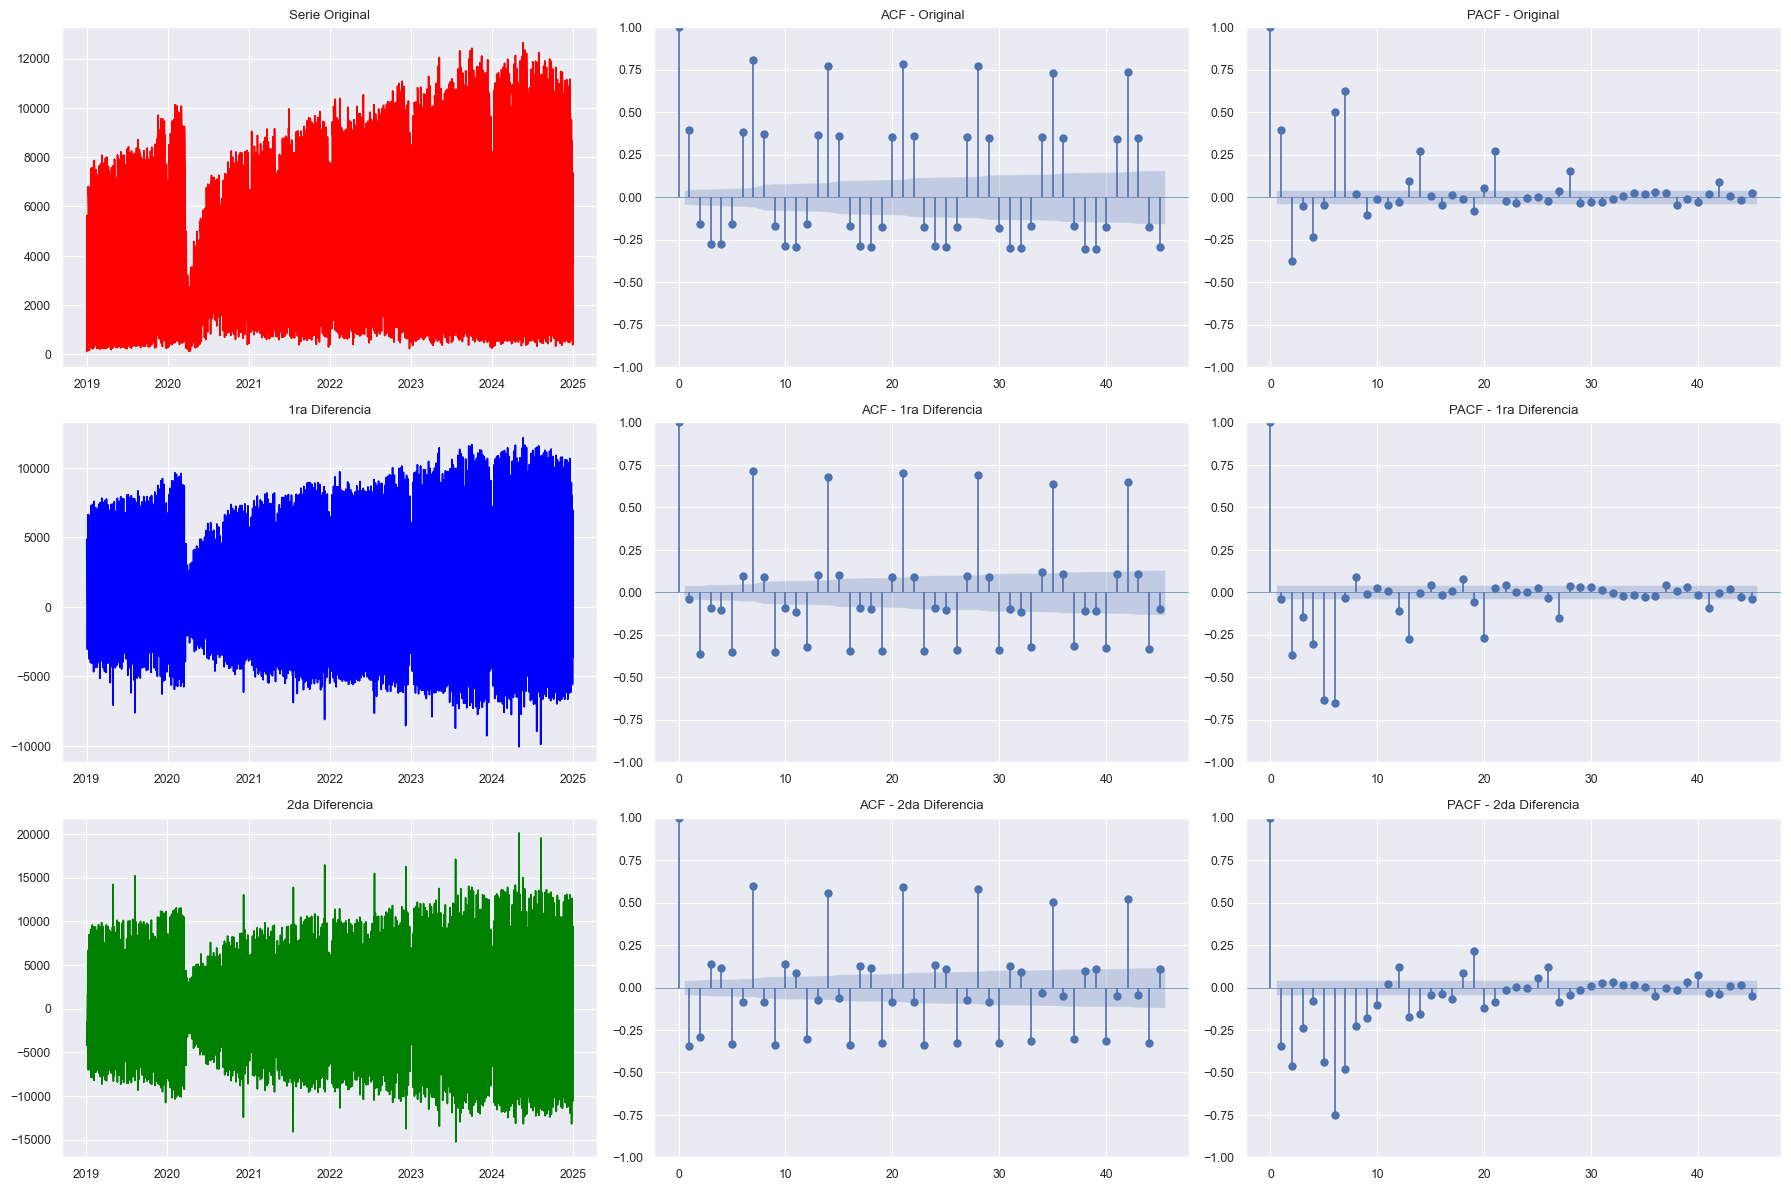

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Aseg√∫rate de tener tu DataFrame cargado
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha y sumar la cantidad diaria
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()
serie_global.index = pd.to_datetime(serie_global.index)

# N√∫mero de rezagos a graficar
nlag = 45

# Series diferenciadas
serie_0 = serie_global
serie_1 = serie_0.diff().dropna()
serie_2 = serie_1.diff().dropna()

# Crear los subgr√°ficos
fig, axes = plt.subplots(3, 3, figsize=(18, 12))

# Serie original
axes[0, 0].plot(serie_0, color='red')
axes[0, 0].set_title('Serie Original')
plot_acf(serie_0.dropna(), lags=nlag, ax=axes[0, 1], linewidth=0.5)
axes[0, 1].set_title('ACF - Original')
plot_pacf(serie_0.dropna(), lags=nlag, ax=axes[0, 2], linewidth=0.5, method='ywm')
axes[0, 2].set_title('PACF - Original')

# 1ra diferencia
axes[1, 0].plot(serie_1, color='blue')
axes[1, 0].set_title('1ra Diferencia')
plot_acf(serie_1, lags=nlag, ax=axes[1, 1], linewidth=0.5)
axes[1, 1].set_title('ACF - 1ra Diferencia')
plot_pacf(serie_1, lags=nlag, ax=axes[1, 2], linewidth=0.5, method='ywm')
axes[1, 2].set_title('PACF - 1ra Diferencia')

# 2da diferencia
axes[2, 0].plot(serie_2, color='green')
axes[2, 0].set_title('2da Diferencia')
plot_acf(serie_2, lags=nlag, ax=axes[2, 1], linewidth=0.5)
axes[2, 1].set_title('ACF - 2da Diferencia')
plot_pacf(serie_2, lags=nlag, ax=axes[2, 2], linewidth=0.5, method='ywm')
axes[2, 2].set_title('PACF - 2da Diferencia')

plt.tight_layout()
plt.show()

En el gr√°fico anterior se observa el an√°lisis de la serie temporal Cantidad en su forma original, con su primera y segunda diferencia, junto con las funciones de autocorrelaci√≥n (ACF) y autocorrelaci√≥n parcial (PACF).

üî¥ La serie original muestra variaciones amplias en magnitud y una tendencia ascendente en ciertos tramos, con presencia de grandes picos y cambios abruptos. La funci√≥n ACF decrece lentamente, lo que indica no estacionariedad. La PACF presenta varios rezagos significativos, confirmando la presencia de autocorrelaci√≥n estructurada.

üîµ La primera diferencia estabiliza la serie alrededor de una media constante, eliminando parte de la tendencia. Tanto la ACF como la PACF muestran una ca√≠da r√°pida tras los primeros rezagos, lo que sugiere que la serie se vuelve estacionaria tras una sola diferenciaci√≥n. Esto sugiere que un modelo ARIMA con d = 1 podr√≠a ser apropiado.

üü¢ La segunda diferencia mantiene la estacionariedad, pero introduce mayor ruido y variabilidad visual sin una mejora significativa en la estructura de autocorrelaci√≥n. Esto sugiere una posible sobrediferenciaci√≥n, por lo que no ser√≠a recomendable aplicar dos diferencias. La serie pierde parte de su estructura √∫til para el modelado.

‚úÖ En resumen, la serie Cantidad se vuelve estacionaria con una sola diferenciaci√≥n, lo cual permite aplicar modelos ARIMA(ùëù,1,ùëû) de forma adecuada para el an√°lisis y la predicci√≥n.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìÜ Descomposici√≥n estacional üìã </p>  

In [49]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

serie_global

FECHA_ATENCION
2019-01-01     114.0
2019-01-02    4982.0
2019-01-03    5637.0
2019-01-04    4703.0
2019-01-05    1656.0
               ...  
2024-12-27    8431.0
2024-12-28    2846.0
2024-12-29     390.0
2024-12-30    7358.0
2024-12-31    3765.0
Name: Cantidad, Length: 2192, dtype: float64

¬øPara qu√© sirve?

Separa la serie en tendencia, estacionalidad y residuales. Con el c√≥digo de abajo, se ha generado es una descomposici√≥n estacional cl√°sica de la serie de tiempo, que es muy √∫til como paso exploratorio previo al modelado ARIMA.

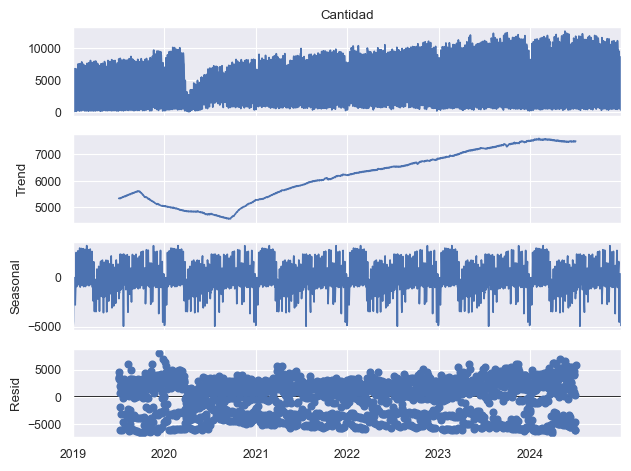

In [50]:
from statsmodels.tsa.seasonal import seasonal_decompose

descomp = seasonal_decompose(serie_global, model='additive', period=365)  # o 30 para mensual
descomp.plot()
plt.tight_layout()
plt.show()

### üìä ¬øQu√© muestra cada componente?

- Cantidad (Original): Es la serie original que est√°s analizando.

- Trend (Tendencia): Captura la evoluci√≥n a largo plazo. En nuestro caso, se observa un incremento gradual en la tendencia, con ca√≠das bruscas que podr√≠an relacionarse con eventos externos (como pandemia o crisis).

- Seasonal (Estacionalidad): Representa patrones repetitivos (diarios, semanales, etc.).

    - Aqu√≠ el componente estacional est√° pr√°cticamente plano, lo que sugiere que no hay una estacionalidad clara de 7 d√≠as.

    - No hay estacionalidad clara, por lo tanto modelo ARIMA en lugar de SARIMA.

- Resid (Residuos): Lo que queda despu√©s de eliminar la tendencia y estacionalidad. Idealmente deber√≠an parecer ruido blanco. En el gr√°fico, hay periodos de mayor dispersi√≥n, indicando eventos at√≠picos.

### üïí ¬øSe incluye en el Data Challenge?

- S√≠, pero como parte del an√°lisis exploratorio, justo antes del modelado ARIMA. Sirve para:

    - Justificar si necesitas o no componente estacional (seasonal=True) en ARIMA/SARIMA.

    - Identificar la presencia de tendencia, lo cual apoya la inclusi√≥n del par√°metro d=1.

    - Evaluar si hay patrones que podr√≠an ser modelados con componentes adicionales (intervenciones, estacionalidad, etc.).

### ‚úÖ Interpretaci√≥n para incluir en el reporte:

- Antes de ajustar el modelo ARIMA, se realiz√≥ una descomposici√≥n estacional aditiva con periodo semanal (7 d√≠as). 

- El componente de tendencia mostr√≥ un comportamiento ascendente a lo largo de los a√±os, reflejando un aumento progresivo en el n√∫mero de registros diarios. 

- Sin embargo, el componente estacional fue pr√°cticamente plano, lo cual indica que no existe una estacionalidad semanal significativa. 

- Por tanto, se justific√≥ utilizar un modelo ARIMA no estacional. Los residuos mostraron picos de variabilidad en ciertos periodos, sugiriendo posibles eventos o rupturas estructurales.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">‚öôÔ∏è Modelo aditivo (c√≥digo de Keyla Alba) üìã </p>  

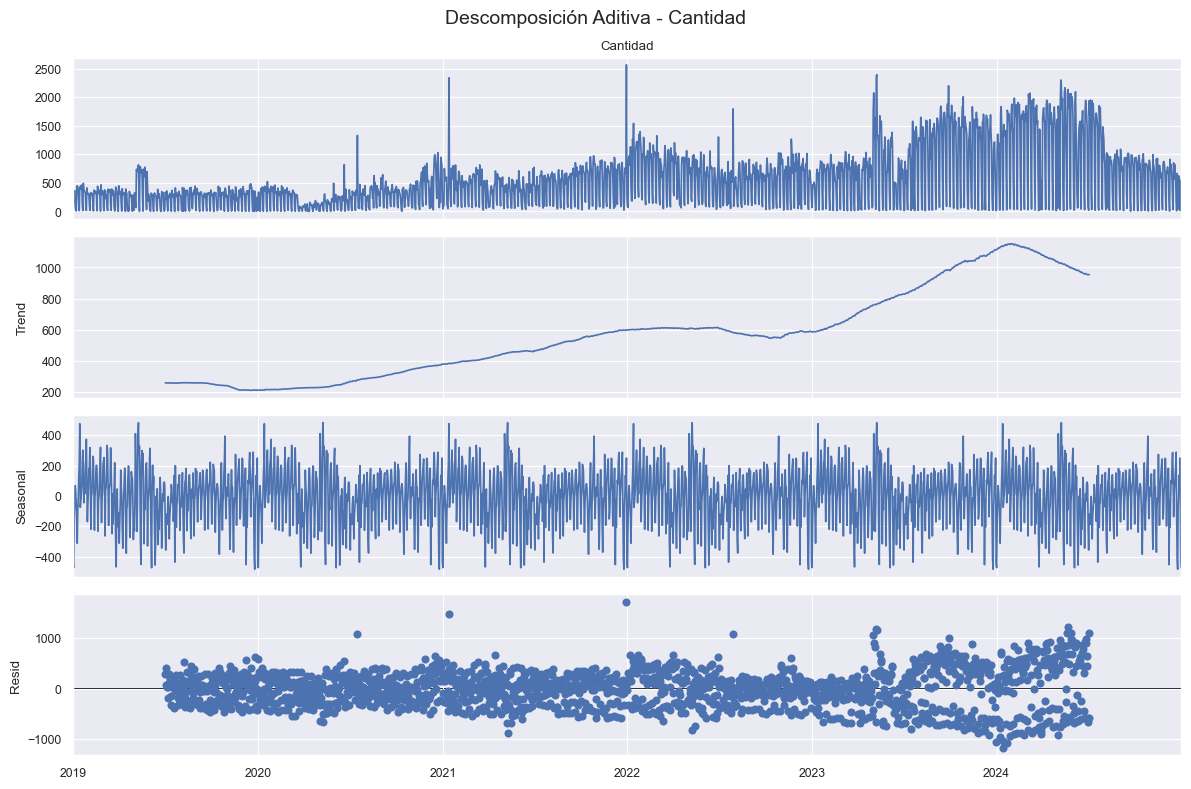

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Aseg√∫rate de tener df10 cargado
serie = df10.copy()

# Conversi√≥n de fecha e indexado
serie['FECHA_ATENCION'] = pd.to_datetime(serie['FECHA_ATENCION'])
serie = serie.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
serie.set_index('FECHA_ATENCION', inplace=True)

# Establecer frecuencia diaria e interpolar valores faltantes
serie = serie.asfreq('D')
serie['Cantidad'] = serie['Cantidad'].interpolate(method='linear')

# Descomposici√≥n aditiva (periodo ~365 d√≠as para patrones anuales)
decompose_add = seasonal_decompose(serie['Cantidad'], model='additive', period=365)

# Visualizaci√≥n
fig_add = decompose_add.plot()
fig_add.set_size_inches(12, 8)
fig_add.suptitle('Descomposici√≥n Aditiva - Cantidad', fontsize=14)
plt.tight_layout()
plt.show()

La descomposici√≥n aditiva de la serie Cantidad permite identificar tres componentes clave: tendencia, estacionalidad y residuo.

- La serie observada muestra un crecimiento general en el volumen de eventos atendidos a lo largo del tiempo, con picos pronunciados y aumentos graduales, especialmente entre 2022 y mediados de 2024, seguidos de una leve reducci√≥n hacia el cierre del periodo.

- La tendencia suavizada revela un comportamiento ascendente sostenido a partir de mediados de 2020, lo cual puede estar asociado a un incremento en la demanda de servicios o cambios operativos institucionales. Esta tendencia alcanza su punto m√°ximo en 2024 antes de mostrar una ligera ca√≠da.

- La componente estacional muestra fluctuaciones frecuentes con cierta regularidad semanal (periodo = 7 d√≠as), con amplitudes que alcanzan los ¬±250. Aunque no es tan suave como en series financieras, s√≠ evidencia patrones repetitivos que podr√≠an corresponder con la operaci√≥n de los servicios por d√≠as laborales o ciclos administrativos.

- El componente de residuo contiene variaciones no explicadas por la tendencia ni por la estacionalidad, incluyendo varios picos significativos, especialmente a partir de 2022. Esto podr√≠a reflejar eventos inesperados o at√≠picos (por ejemplo, campa√±as especiales, cambios normativos o alteraciones operativas).

<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> ‚öôÔ∏è ARIMA (p,d,q) con  c√≥digo de Keyla Albaüîç</p>  

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìå B√∫squeda autom√°tica de par√°metros con c√≥digo de Keyla Alba üìã </p>  

In [52]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Agrupar por fecha (sin hora) y sumar cantidades
serie_global = df10.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum()  # Por d√≠a
#serie_global = df10.groupby(df10['FECHA_ATENCION'])['Cantidad'].sum()  # Por hora

# Lista para almacenar los resultados
aicVal = []

# Conversi√≥n de la serie a lista num√©rica sin valores NaN
datos = serie_global.dropna().tolist()

# Evaluar modelos ARIMA(p,d,q) con p y q de 0 a 2 y d en {0,1}
for d in range(0, 2):  # d = 0 o 1
    for p in range(0, 3):  # AR
        for q in range(0, 3):  # MA
            try:
                modelo = ARIMA(datos, order=(p, d, q))
                resultado = modelo.fit()
                aicVal.append([p, d, q, resultado.aic])
            except:
                pass

# Convertir los resultados en un DataFrame para an√°lisis
data_AIC = pd.DataFrame(aicVal, columns=['AR(p)', 'D(d)', 'MA(q)', 'AIC']).sort_values(by='AIC')
print(data_AIC)

    AR(p)  D(d)  MA(q)           AIC
17      2     1      2  41124.516541
16      2     1      1  41405.289134
8       2     0      2  41546.776883
7       2     0      1  41551.095959
6       2     0      0  41572.920916
14      1     1      2  41582.328894
11      0     1      2  41591.405476
5       1     0      2  41644.195008
1       0     0      1  41664.573154
4       1     0      1  41669.809735
2       0     0      2  41674.707942
13      1     1      1  41834.990539
3       1     0      0  41904.499096
10      0     1      1  42123.360220
15      2     1      0  42349.035561
12      1     1      0  42665.079228
9       0     1      0  42666.298100
0       0     0      0  56950.114183


In [53]:
print('Mejores par√°metros ARIMA seg√∫n AIC:\n')
data_AIC[data_AIC.AIC == data_AIC.AIC.min()]

Mejores par√°metros ARIMA seg√∫n AIC:



AR(p)  D(d)  MA(q)           AIC
17      2     1      2  41124.516541

### üìå Interpretaci√≥n del Resultado: ARIMA(2, 1, 2)

El resultado indica que el modelo ARIMA(2, 1, 2) es el que presenta el menor valor de AIC (Akaike Information Criterion) entre todos los modelos evaluados. A continuaci√≥n te explico lo que significa cada parte y c√≥mo interpretarlo:

- AR(p) = 2: El modelo incluye dos t√©rminos autorregresivos, lo que significa que la predicci√≥n actual depende de los valores observados en los dos periodos anteriores.

- D(d) = 1: Se ha aplicado una primera diferencia a la serie original para hacerla estacionaria. Este valor es coherente con las pruebas previas (ADF y ACF/PACF), que indicaban que una sola diferenciaci√≥n era suficiente para estabilizar la media.

- MA(q) = 2: Se incorporan dos t√©rminos de media m√≥vil, es decir, se consideran los errores de los dos √∫ltimos periodos para corregir las predicciones.

- AIC = 41124.52: Este valor representa el equilibrio entre el ajuste del modelo y su complejidad. Cuanto m√°s bajo sea el AIC, mejor es el modelo en t√©rminos de ajuste penalizado por el n√∫mero de par√°metros. Aqu√≠, ARIMA(2,1,2) fue el mejor modelo dentro de la grilla evaluada.


### ‚úÖ Conclusi√≥n

- El modelo ARIMA(2,1,2) es una opci√≥n adecuada y parsimoniosa para modelar tu serie temporal.

- Tiene un n√∫mero razonable de par√°metros y respeta la condici√≥n de d = 1, que como vimos antes, es suficiente para lograr estacionariedad seg√∫n ADF.

- Puede considerarse para pron√≥stico, an√°lisis residual y validaci√≥n posterior (estacionariedad de residuos, autocorrelaci√≥n, normalidad, etc.).

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìå Estimando ARIMA (2,1,2) con c√≥digo de Keyla Alba üìã </p>  

In [54]:
# Crear una copia para no modificar el original
df11 = df10.copy()

In [55]:
filas, columnas = df11.shape
print(f"N√∫mero de filas: {filas}")
print(f"N√∫mero de columnas: {columnas}")

N√∫mero de filas: 9984660
N√∫mero de columnas: 26


In [56]:
for col in df11.columns:
    print(col)

Nombre_Oficina_Arp
Numero_Uen_Arp
Siniestro_Arp_Id
Nombre_Sinies_Diagnosti_Princi
Siniestro_Diagnosti_Princi_Id
Nombre_Tipo_Atencion_Arp
DNI_IPS
Nombre_IPS
Nombre_Municipio_IPS
Nombre_Departamento_IPS
NOMBRE_SUCURSAL
NOMBRE_MUNICIPIO_SUCURSAL
NOMBRE_DEPARTAMENTO_SUCURSAL
Nombre_Municipio_Establecimiento
FECHA_ATENCION
Tipo_Llamada_Arp_Desc
TIPIFICACION
Cantidad
MUNICIPIO
HOMOLOGACION NIT
Year
Month
Day
Hour
Date
Nombre_Municipio_IPS2


In [57]:
from statsmodels.tsa.arima.model import ARIMA
import numpy as np

# Ajustar el modelo ARIMA(2,1,2) a la columna 'Cantidad' del DataFrame df11
modelo_arima = ARIMA(df11['Cantidad'], order=(2, 1, 2))
modelo_fit = modelo_arima.fit()

# Obtener valores ajustados (fitted values) y agregar ceros iniciales por p√©rdida de observaciones
pred = np.append([0, 0], modelo_fit.fittedvalues.to_list())
n_first = pred.shape[0] - df11.shape[0]
df11['ARIMA'] = pred[n_first:]  # Agregar columna con los valores ajustados

# Obtener residuos y agregarlos tambi√©n al DataFrame
diffval = np.append([0, 0], modelo_fit.resid)
df11['diffval'] = diffval[n_first:]  # Agregar columna de residuos

# Visualizar las √∫ltimas filas
df11.tail()

c:\Users\HLLINAS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HLLINAS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HLLINAS\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Nombre_Oficina_Arp Numero_Uen_Arp Siniestro_Arp_Id  \
9984655  OFICINA BARRANQUILLA            519       5f1bbbea73   
9984656   OFICINA BUCARAMANGA            531       551a190298   
9984657   OFICINA BUCARAMANGA            531       e08aad69cd   
9984658   OFICINA BUCARAMANGA            531       4901b6d176   
9984659      OFICINA MEDELLIN            215       f9bce7b761   

        Nombre_Sinies_Diagnosti_Princi Siniestro_Diagnosti_Princi_Id  \
9984655                           S066                          S066   
9984656                           S610                          S610   
9984657                           T812                          T812   
9984658                           S800                          S800   
9984659                           S407                          S407   

              Nombre_Tipo_Atencion_Arp     DNI_IPS  Nombre_IPS  \
9984655  UNIDAD DE CUIDADOS INTENSIVOS  3ebb7237f0  99070b8411   
9984656                    AMBULATORIA  5708b4378b  905d8f470c   
9984657                    AMBULATORIA  5708b4378b  905d8f470c   
9984658                    AMBULATORIA  5708b4378b  905d8f470c   
9984659        QUIRURGICO HOSPITALARIO  6a4c76d167  d91efffa95   

        Nombre_Municipio_IPS Nombre_Departamento_IPS  ...    MUNICIPIO  \
9984655  CARTAGENA DE INDIAS                 BOLIVAR  ...      DIBULLA   
9984656             MEDELLIN               ANTIOQUIA  ...  BUCARAMANGA   
9984657             MEDELLIN               ANTIOQUIA  ...  BUCARAMANGA   
9984658             MEDELLIN               ANTIOQUIA  ...  BUCARAMANGA   
9984659               CALDAS               ANTIOQUIA  ...     MEDELLIN   

        HOMOLOGACION NIT  Year Month Day Hour        Date  \
9984655       25ef4f22e6  2024    12  31   21  2024-12-31   
9984656       3d1546fd2b  2024    12  31   21  2024-12-31   
9984657       3d1546fd2b  2024    12  31   21  2024-12-31   
9984658       3d1546fd2b  2024    12  31   21  2024-12-31   
9984659       de29085d01  2024    12  31   22  2024-12-31   

         Nombre_Municipio_IPS2     ARIMA   diffval  
9984655    CARTAGENA DE INDIAS  1.179670 -0.179670  
9984656               MEDELLIN  1.178868 -0.178868  
9984657               MEDELLIN  1.178216 -0.178216  
9984658               MEDELLIN  1.177431 -0.177431  
9984659                 CALDAS  1.176774 -0.176774  

[5 rows x 28 columns]

In [58]:
filas, columnas = df11.shape
print(f"N√∫mero de filas: {filas}")
print(f"N√∫mero de columnas: {columnas}")

N√∫mero de filas: 9984660
N√∫mero de columnas: 28


In [59]:
#df11.to_excel("df11_excel_arima_keyla1.xlsx", index=False)
#df11.to_csv("df11_csv_arima_keyla1.csv", index=False)
#df11.to_csv("df11_txt_arima_keyla1.txt", sep="\t", index=False)

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìå Reduciendo a pocas variables ARIMA (2,1,2) con c√≥digo de Keyla Alba üìã </p>  

In [ ]:
# Cargar el archivo TXT (puede estar delimitado por comas, tabulaciones u otro car√°cter)
# Aseg√∫rate del delimitador correcto: si es CSV, puede que sea ',' o ';'; si es de Excel tabulado, suele ser '\t'
#df11 = pd.read_csv('df11_txt_arima_keyla1.txt', encoding='utf-8', sep='\t', low_memory=False)  # Cambia '\t' si el delimitador es otro

FileNotFoundError: [Errno 2] No such file or directory: 'df11_txt_arima_keyla1.txt'

In [61]:
# Crear df12 seleccionando solo las columnas deseadas de df11
df12 = df11[[ 'HOMOLOGACION NIT', 'Tipo_Llamada_Arp_Desc', 'Nombre_Tipo_Atencion_Arp', 'Nombre_Municipio_IPS2', 'FECHA_ATENCION', 'Cantidad', 'ARIMA', 'diffval']].copy()

# Verificar las √∫ltimas filas
df12.tail()

HOMOLOGACION NIT Tipo_Llamada_Arp_Desc       Nombre_Tipo_Atencion_Arp  \
9984655       25ef4f22e6           CONTROL IPS  UNIDAD DE CUIDADOS INTENSIVOS   
9984656       3d1546fd2b               No info                    AMBULATORIA   
9984657       3d1546fd2b               No info                    AMBULATORIA   
9984658       3d1546fd2b               No info                    AMBULATORIA   
9984659       de29085d01           CONTROL IPS        QUIRURGICO HOSPITALARIO   

        Nombre_Municipio_IPS2      FECHA_ATENCION  Cantidad     ARIMA  \
9984655   CARTAGENA DE INDIAS 2024-12-31 21:14:00       1.0  1.179670   
9984656              MEDELLIN 2024-12-31 21:31:10       1.0  1.178868   
9984657              MEDELLIN 2024-12-31 21:37:52       1.0  1.178216   
9984658              MEDELLIN 2024-12-31 21:39:57       1.0  1.177431   
9984659                CALDAS 2024-12-31 22:35:00       1.0  1.176774   

          diffval  
9984655 -0.179670  
9984656 -0.178868  
9984657 -0.178216  
9984658 -0.177431  
9984659 -0.176774

In [ ]:
#df12.to_excel("df12_excel_arima_keyla2.xlsx", index=False)
#df12.to_csv("df12_csv_arima_keyla2.csv", index=False)
#df12.to_csv("df12_txt_arima_keyla2.txt", sep="\t", index=False)

In [ ]:
# Cargar el archivo TXT (puede estar delimitado por comas, tabulaciones u otro car√°cter)
# Aseg√∫rate del delimitador correcto: si es CSV, puede que sea ',' o ';'; si es de Excel tabulado, suele ser '\t'
#df12 = pd.read_csv('df12_txt_arima_keyla2.txt', encoding='utf-8', sep='\t', low_memory=False)  # Cambia '\t' si el delimitador es otro

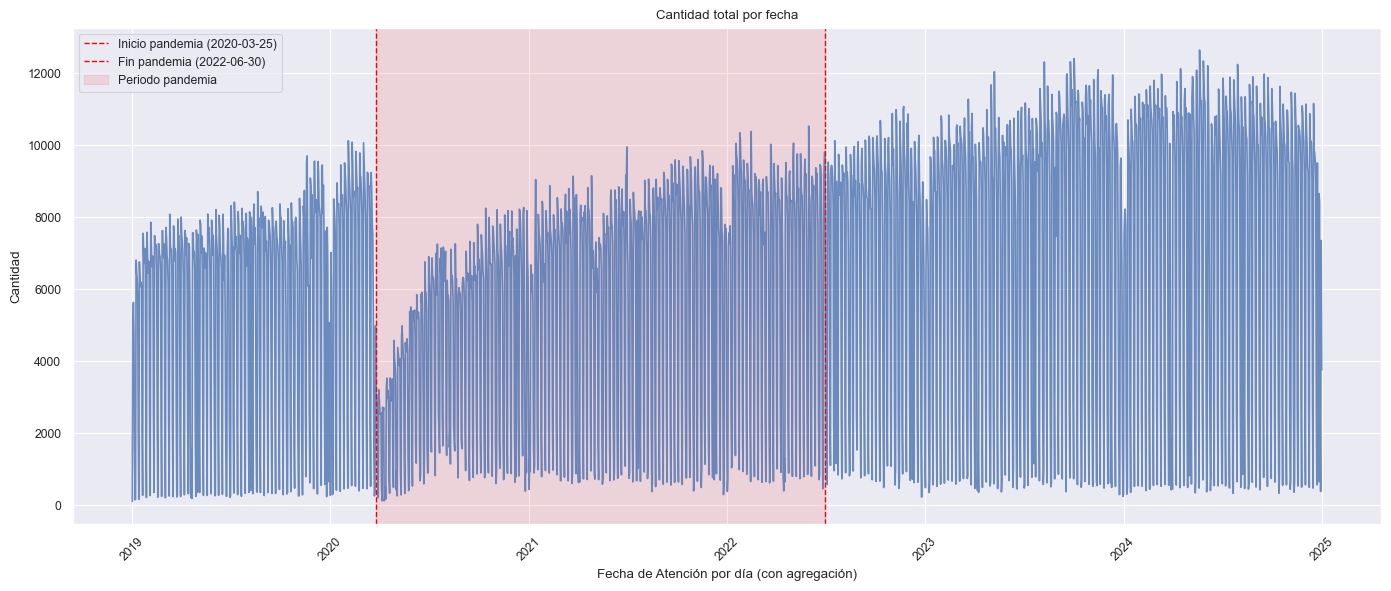

In [62]:
import pandas as pd 
import matplotlib.pyplot as plt

# Aseg√∫rate de que la fecha est√© en formato datetime
df12['FECHA_ATENCION'] = pd.to_datetime(df12['FECHA_ATENCION'])

# Agrupar por d√≠a (sin hora) y sumar la cantidad
serie_diaria = df12.groupby(df10['FECHA_ATENCION'].dt.date)['Cantidad'].sum().reset_index()
serie_diaria.columns = ['FECHA', 'Cantidad']
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

# Ordenar por fecha
serie_diaria = serie_diaria.sort_values('FECHA')

# Fechas clave
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Graficar
plt.figure(figsize=(14, 6))
plt.plot(serie_diaria['FECHA'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

# L√≠neas verticales
plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')

# Sombreado del per√≠odo de pandemia
plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

# Est√©tica del gr√°fico
plt.title('Cantidad total por fecha')
plt.xlabel('Fecha de Atenci√≥n por d√≠a (con agregaci√≥n)')
plt.ylabel('Cantidad')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [63]:
# Aseg√∫rate de que FECHA_ATENCION est√© en formato datetime
df12['FECHA_ATENCION'] = pd.to_datetime(df12['FECHA_ATENCION'])

# Agrupar por fecha (d√≠a) y sumar Cantidad y ARIMA
serie_diaria = df12.groupby(df12['FECHA_ATENCION'].dt.date).agg({
    'Cantidad': 'sum',
    'ARIMA': 'sum'  # Aseg√∫rate de que ARIMA tenga sentido sumado por d√≠a
}).reset_index()

# Renombrar columna
serie_diaria.columns = ['FECHA', 'Cantidad', 'ARIMA']
serie_diaria['FECHA'] = pd.to_datetime(serie_diaria['FECHA'])

serie_diaria

FECHA  Cantidad        ARIMA
0    2019-01-01     114.0   127.797737
1    2019-01-02    4982.0  4904.996992
2    2019-01-03    5637.0  5668.055549
3    2019-01-04    4703.0  4727.823711
4    2019-01-05    1656.0  1709.967294
...         ...       ...          ...
2187 2024-12-27    8431.0  8400.313630
2188 2024-12-28    2846.0  2854.753292
2189 2024-12-29     390.0   403.115591
2190 2024-12-30    7358.0  7375.559669
2191 2024-12-31    3765.0  3739.650077

[2192 rows x 3 columns]

In [64]:
import plotly.graph_objects as go

# Crear gr√°fico interactivo
fig = go.Figure()

# Serie real
fig.add_trace(go.Scatter(
    x=serie_diaria['FECHA'],
    y=serie_diaria['Cantidad'],
    mode='lines',
    name='Cantidad (real)',
    line=dict(color='black')
))

# Serie ajustada ARIMA
fig.add_trace(go.Scatter(
    x=serie_diaria['FECHA'],
    y=serie_diaria['ARIMA'],
    mode='lines',
    name='ARIMA(2,1,2) Ajustado',
    line=dict(color='red', dash='dash')
))

# Layout
fig.update_layout(
    title='Ajuste del Modelo ARIMA(2,1,2) a la Serie Agregada por D√≠a',
    xaxis_title='Fecha',
    yaxis_title='Cantidad Total por D√≠a',
    template='plotly_white',
    height=500
)

fig.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìå Graficando por semana ARIMA (2,1,2) con c√≥digo de Keyla Alba üìã </p>  

In [65]:
# Aseg√∫rate de que FECHA_ATENCION est√© en formato datetime
df12['FECHA_ATENCION'] = pd.to_datetime(df12['FECHA_ATENCION'])

# Crear una columna con el inicio de la semana (lunes) correspondiente
df12['SEMANA'] = df12['FECHA_ATENCION'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar por semana y sumar Cantidad y ARIMA
serie_semanal = df12.groupby('SEMANA').agg({
    'Cantidad': 'sum',
    'ARIMA': 'sum'  # Aseg√∫rate que tenga sentido sumar ARIMA por semana
}).reset_index()

# Renombrar columna si lo deseas
serie_semanal.columns = ['FECHA_SEMANA', 'Cantidad', 'ARIMA']

serie_semanal

FECHA_SEMANA  Cantidad         ARIMA
0     2018-12-31   17249.0  17322.182466
1     2019-01-07   27720.0  27729.110157
2     2019-01-14   33816.0  33808.035178
3     2019-01-21   37515.0  37531.190461
4     2019-01-28   36978.0  36965.504538
..           ...       ...           ...
309   2024-12-02   53246.0  53254.680396
310   2024-12-09   53456.0  53452.140520
311   2024-12-16   52942.0  52940.828402
312   2024-12-23   35765.0  35740.455531
313   2024-12-30   11123.0  11115.209746

[314 rows x 3 columns]

In [66]:
import plotly.graph_objects as go

# Crear gr√°fico interactivo
fig = go.Figure()

# Serie real (Cantidad semanal)
fig.add_trace(go.Scatter(
    x=serie_semanal['FECHA_SEMANA'],
    y=serie_semanal['Cantidad'],
    mode='lines',
    name='Cantidad (real)',
    line=dict(color='black')
))

# Serie ajustada (ARIMA semanal)
fig.add_trace(go.Scatter(
    x=serie_semanal['FECHA_SEMANA'],
    y=serie_semanal['ARIMA'],
    mode='lines',
    name='ARIMA(2,1,2) Ajustado',
    line=dict(color='red', dash='dash')
))

# Layout
fig.update_layout(
    title='Ajuste del Modelo ARIMA(2,1,2) a la Serie Agregada por Semana',
    xaxis_title='Fecha de Inicio de Semana',
    yaxis_title='Cantidad Total por Semana',
    template='plotly_white',
    height=500
)

fig.show()

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìå B√∫squeda autom√°tica de par√°metros con `auto_arima` üìã </p>  

In [67]:
# Asegurarse de que FECHA_ATENCION sea tipo datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Crear columna de inicio de semana (lunes) correspondiente
df10['SEMANA'] = df10['FECHA_ATENCION'].dt.to_period('W').apply(lambda r: r.start_time)

# Agrupar por semana y sumar las cantidades
serie_global = df10.groupby('SEMANA')['Cantidad'].sum()

serie_global


SEMANA
2018-12-31    17249.0
2019-01-07    27720.0
2019-01-14    33816.0
2019-01-21    37515.0
2019-01-28    36978.0
               ...   
2024-12-02    53246.0
2024-12-09    53456.0
2024-12-16    52942.0
2024-12-23    35765.0
2024-12-30    11123.0
Name: Cantidad, Length: 314, dtype: float64

Usa la librer√≠a `pmdarima` para buscar autom√°ticamente los mejores par√°metros (seg√∫n AIC/BIC):

In [68]:
from pmdarima.arima import auto_arima

modelo_auto = auto_arima(serie_global.dropna(), seasonal=False, trace=True)
print(modelo_auto.summary())

ModuleNotFoundError: No module named 'pmdarima'


### ¬øC√≥mo interpretar el output actual?

- El modelo final sugerido es ARIMA(2,1,5), con:

- 2 t√©rminos autorregresivos (AR)

- 1 diferenciaci√≥n (d)

- 5 t√©rminos de media m√≥vil (MA)

- La mayor√≠a de los coeficientes son significativos (p < 0.05), lo cual respalda la validez del modelo. Adem√°s:

- El AIC = 40576.734 indica la calidad del ajuste (m√°s bajo = mejor).

- La prueba de Ljung-Box (Prob(Q)=0.91) sugiere que los residuos son ruido blanco ‚Üí buen ajuste.

- La prueba Jarque-Bera (p=0.00) sugiere que los residuos no siguen una distribuci√≥n normal, pero esto no necesariamente invalida el modelo, especialmente en series grandes.

### Observaci√≥n

- Aunque previamente aplicamos la prueba de Dickey-Fuller y obtuvimos un p-valor de 0.0014, lo cual indica estacionariedad, el modelo ARIMA sugerido por auto_arima tiene un valor de d=1, lo que implica que aplic√≥ una diferenciaci√≥n para alcanzar la estacionariedad.

### ¬øPor qu√© ocurre esto?

- `auto_arima` aplica su propio test interno (por ejemplo, KPSS o ADF) y a veces prefiere ser conservador y asumir una diferenciaci√≥n adicional (d=1) para asegurar estacionariedad, sobre todo si la serie muestra tendencias suaves o no es estrictamente estacionaria en media.

### ¬øQu√© hacer?

Hay dos opciones:

### ‚úÖ Opci√≥n 1: Aceptar el modelo propuesto

- El modelo ARIMA(2,1,5) fue seleccionado como el mejor seg√∫n el AIC.

- Si el modelo tiene buen ajuste (residuos ~ ruido blanco), puedes seguir con √©l.

### üîç Opci√≥n 2: Forzar d=0 manualmente

Esto te permite comparar ambos modelos (con y sin diferenciaci√≥n).

Si el modelo con d=0 tiene AIC similar y residuos adecuados, podr√≠as preferirlo.

In [ ]:
modelo_d0 = auto_arima(serie_global.dropna(), d=0, seasonal=False, trace=True)
print(modelo_d0.summary())

### üìå Recomendaci√≥n Final

- Seguir con ARIMA(2,1,5) si:

- El diagn√≥stico de residuos es aceptable.

- Si se quiere seguir el criterio de auto_arima basado en AIC.

- Sin embargo, si el objetivo es un modelo m√°s parsimonioso y te√≥rico (basado en pruebas de ra√≠z unitaria), puedes probar tambi√©n con ARIMA(2,0,5) y comparar AIC/BIC/residuos.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìå Comparaci√≥n ARIMA(5,0,1) vs ARIMA(2,1,5) üìã </p>  

In [ ]:
from IPython.display import Image, display

# Mostrar imagen
display(Image(filename='Comparacion_ARIMA.png'))

In [ ]:
import plotly.graph_objects as go

header = ['Criterio', 'ARIMA(5,0,1)', 'ARIMA(2,1,5)']
rows = [
    ['Modelo', 'ARIMA(5, 0, 1)', 'ARIMA(2, 1, 5)'],
    ['AIC', '‚úÖ 41058.52', '‚ùå 40576.73 (mejor, pero contradice ADF)'],
    ['BIC', '‚úÖ 41098.37', '‚ùå 40622.27'],
    ['Estacionariedad', '‚úÖ d = 0 (coherente con ADF)', '‚ùå d = 1 (contradice ADF)'],
    ['Coef. significativos', '‚úÖ S√≠', '‚úÖ S√≠'],
    ['Advertencia covarianza', '‚ö†Ô∏è S√≠, matriz casi singular', '‚úÖ No'],
    ['Ljung-Box (residuos)', '‚úÖ Prob(Q) = 0.09 (no autocorr)', '‚úÖ Prob(Q) = 0.91 (aceptable)'],
    ['Jarque-Bera (normalidad)', '‚ùå JB = 40.36, p = 0.00', '‚ùå JB = 293.55, p = 0.00']
]

fig = go.Figure(data=[go.Table(
    header=dict(values=header, fill_color='lightgray', align='left'),
    cells=dict(values=[list(col) for col in zip(*rows)],
               fill_color='white',
               align='left'))
])

fig.update_layout(width=1000, height=400)
fig.show()


### üìâ Interpretaci√≥n del modelo ARIMA(5,0,1):

- Todos los coeficientes AR y MA son estad√≠sticamente significativos (p < 0.05).

- La serie fue modelada como estacionaria (d = 0), lo cual es coherente con la prueba de Dickey-Fuller previa.

- No hay autocorrelaci√≥n remanente significativa (Ljung-Box Prob(Q) = 0.09 > 0.05), lo cual indica un buen ajuste.

- Sin embargo, hay una advertencia sobre la matriz de covarianza, indicando posible multicolinealidad entre los par√°metros o un sobreajuste.

### ‚úÖ Conclusi√≥n final: ¬øCu√°l modelo elegir?

- El modelo ARIMA(5,0,1) es m√°s coherente con el an√°lisis previo, especialmente con:

- La prueba de estacionariedad (ADF),

- Y la parsimonia (modelo m√°s simple en t√©rminos de diferencias).

- Aunque el ARIMA(2,1,5) tiene mejor AIC/BIC, viola el supuesto de estacionariedad al forzar una diferenciaci√≥n innecesaria.

### üü© Recomendaci√≥n: 

- Usar ARIMA(5,0,1) como modelo final para el Data Challenge.

- Sugerencia adicional: 
    - En el informe, se puede mencionar que se compararon varios modelos y que se prioriz√≥ la coherencia estad√≠stica y la validez te√≥rica sobre una ligera mejora en el AIC/BIC.

<a id="5"></a>
### <p style="padding:10px;background-color:grey ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">üìà El modelo ARIMA (5,0,1) üìã </p>  

### ‚úÖ Soluci√≥n paso a paso

Si nuestro mejor modelo es el ARIMA(5,0,1), podemos definirlo manualmente con SARIMAX de `statsmodels` y luego hacer la predicci√≥n as√≠:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Simulaci√≥n de la serie (reemplazar esto por tu serie real: serie_global)
np.random.seed(42)
fechas = pd.date_range(start="2019-01-01", periods=2192, freq='D')
valores = np.random.poisson(lam=5000, size=2192) + np.linspace(0, 3000, 2192)
serie_global = pd.Series(valores, index=fechas)
serie_global.index.freq = 'D'

# Ajustar modelo ARIMA(5,0,1)
model = ARIMA(serie_global, order=(5, 0, 1))
model_fit = model.fit()

# Pron√≥stico para 30 d√≠as
forecast = model_fit.get_forecast(steps=30)
predicted_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# √çndice para los pron√≥sticos
forecast_index = pd.date_range(start=serie_global.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

# Graficar
plt.figure(figsize=(15, 6))
plt.plot(serie_global.index, serie_global, label="Hist√≥rico", color='blue')
plt.plot(forecast_index, predicted_mean, label="Pron√≥stico ARIMA(5,0,1)", color='red')
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3, label='IC 95%')
plt.title('Pron√≥stico de eventos (ARIMA(5,0,1))')
plt.xlabel('Fecha')
plt.ylabel('Cantidad')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar resumen del modelo
print(model_fit.summary())

### ‚úÖ ¬øPara qu√© sirve el modelo ARIMA(5,0,1)?

Este modelo te permite:

- Hacer predicciones futuras de la variable Cantidad (por ejemplo, cu√°ntos eventos esperar ma√±ana, la pr√≥xima semana, etc.).

- Detectar patrones ocultos en la serie temporal que no son visibles a simple vista.

- Evaluar el comportamiento estructural del sistema antes, durante y despu√©s de eventos relevantes (como la pandemia).

- Comparar escenarios y anticipar cambios operativos o de demanda en funci√≥n de la evoluci√≥n hist√≥rica.

### üìà ¬øQu√© hace el modelo ARIMA(5,0,1)?

Nuestro modelo tiene estos componentes:

- p = 5 (autoregresivo): utiliza los √∫ltimos 5 valores pasados para predecir el siguiente.

- d = 0 (no hay diferenciaci√≥n): la serie ya es estacionaria, as√≠ que no necesita transformarse.

- q = 1 (promedio m√≥vil): corrige el error de predicci√≥n con base en el √∫ltimo error cometido.

### En resumen: ARIMA(5,0,1) dice:

- ‚ÄúPredigo la Cantidad de hoy usando los √∫ltimos 5 d√≠as + el error cometido ayer.‚Äù

### üîÅ ¬øQu√© puedes hacer con este modelo?

1. Hacer pron√≥sticos

In [ ]:
pred = modelo_arima.predict(n_periods=30)  # predicci√≥n para 30 d√≠as futuros
print(pred)

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt

# Asegurarse de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Fechas clave de la pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Lista de tipos de atenci√≥n √∫nicos (excluye NaN)
tipos_atencion = df10['Nombre_Tipo_Atencion_Arp'].dropna().unique()

# Bucle por cada tipo de atenci√≥n
for tipo in tipos_atencion:
    # Filtrar datos por tipo de atenci√≥n
    df_tipo = df10[df10['Nombre_Tipo_Atencion_Arp'] == tipo]

    # Agrupar por fecha y sumar la cantidad
    serie_diaria = df_tipo.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
    serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

    # Graficar
    plt.figure(figsize=(14, 6))
    plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

    # L√≠neas y sombreado del per√≠odo de pandemia
    plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
    plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
    plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

    # Est√©tica
    plt.title(f'Cantidad total por fecha - Tipo de Atenci√≥n: {tipo}')
    plt.xlabel('Fecha de Atenci√≥n por hora (con agregaci√≥n)')
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

<a id="5"></a>
# <p style="padding:10px;background-color:#4A235A ;margin:0;color:#E2EEF3;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500"> Serie de tiempo por `Nombre_Municipio_IPS2`  üîç</p> 

In [ ]:
import pandas as pd  
import matplotlib.pyplot as plt

# Aseg√∫rate de que la fecha est√© en formato datetime
df10['FECHA_ATENCION'] = pd.to_datetime(df10['FECHA_ATENCION'])

# Fechas de pandemia
inicio_pandemia = pd.to_datetime('2020-03-25')
fin_pandemia = pd.to_datetime('2022-06-30')

# Lista de municipios √∫nicos
municipios = df10['Nombre_Municipio_IPS2'].unique()

# Bucle para graficar cada municipio
for municipio in municipios:
    # Filtrar los datos del municipio
    df_muni = df10[df10['Nombre_Municipio_IPS2'] == municipio]
    
    # Agrupar por fecha y sumar la cantidad
    serie_diaria = df_muni.groupby('FECHA_ATENCION')['Cantidad'].sum().reset_index()
    serie_diaria = serie_diaria.sort_values('FECHA_ATENCION')

    # Crear la figura
    plt.figure(figsize=(14, 6))
    plt.plot(serie_diaria['FECHA_ATENCION'], serie_diaria['Cantidad'], linestyle='-', alpha=0.8)

    # L√≠neas y sombreado
    plt.axvline(inicio_pandemia, color='red', linestyle='--', linewidth=1, label='Inicio pandemia (2020-03-25)')
    plt.axvline(fin_pandemia, color='red', linestyle='--', linewidth=1, label='Fin pandemia (2022-06-30)')
    plt.axvspan(inicio_pandemia, fin_pandemia, color='red', alpha=0.1, label='Periodo pandemia')

    # Est√©tica
    plt.title(f'Cantidad total por fecha - {municipio}')
    plt.xlabel('Fecha de Atenci√≥n por hora (con agregaci√≥n)')
    plt.ylabel('Cantidad')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
for col in df10.columns:
    print(col)

In [ ]:
from statsmodels.tsa.stattools import adfuller

# Agrupar por fecha
serie_diaria = df.groupby(df['FECHA_ATENCION'].dt.date).size().reset_index(name='conteo')
serie_diaria.columns = ['fecha', 'conteo']
serie_diaria.set_index('fecha', inplace=True)

# Aplicar la prueba de Dickey-Fuller
resultado = adfuller(serie_diaria['conteo'])

# Mostrar resultados
print('Estad√≠stico ADF:', resultado[0])
print('Valor p:', resultado[1])
print('Valores cr√≠ticos:')
for clave, valor in resultado[4].items():
    print(f'   {clave}: {valor}')